In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# بارگذاری فایل CSV
file_path = "/content/ENB2012_data.csv"
df1 = pd.read_csv(file_path)

# انتخاب فقط 769 سطر و 10 ستون اول
df = df1.iloc[:768, :10]

# بررسی تعداد سطرها و ستون‌های جدید
print(f"Cleaned dataset shape: {df.shape}")

# نمایش ۵ سطر اول برای اطمینان از پاک‌سازی
print(df.head())


Cleaned dataset shape: (768, 10)
     X1     X2     X3      X4   X5   X6   X7   X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0  2.0  0.0  0.0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0  3.0  0.0  0.0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0  4.0  0.0  0.0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0  5.0  0.0  0.0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0  2.0  0.0  0.0  20.84  28.28


In [ ]:
print(df.dtypes)


X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
Y1    float64
Y2    float64
dtype: object


In [ ]:
df = df.apply(pd.to_numeric, errors='coerce')  # تبدیل مقادیر به عددی، تبدیل رشته‌های نامعتبر به NaN

In [ ]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [ ]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.replace("", np.nan, inplace=True)  # تبدیل فضای خالی به NaN


<ipython-input-5-ae74ab4521c9>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:

# بررسی توزیع داده‌ها (اختیاری)
print(df.describe())


               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307201   24.587760  
std      0.133221    1.55096   10.090196    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25% 

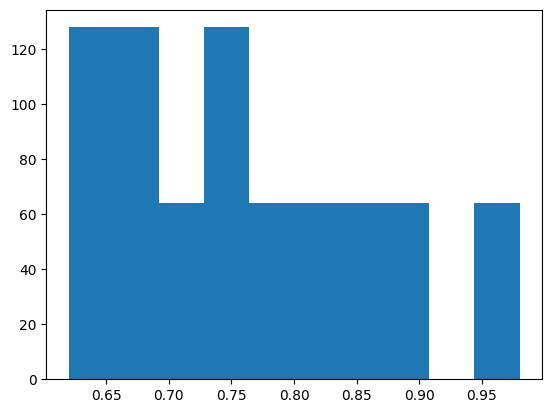

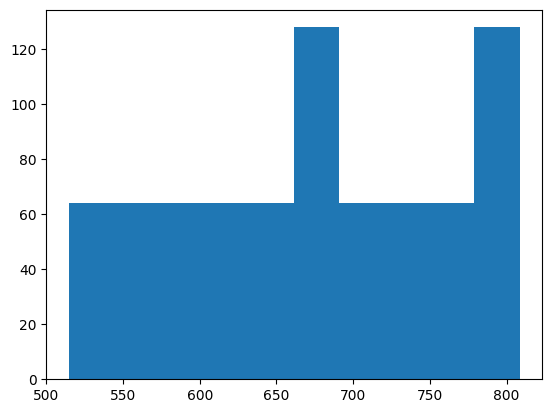

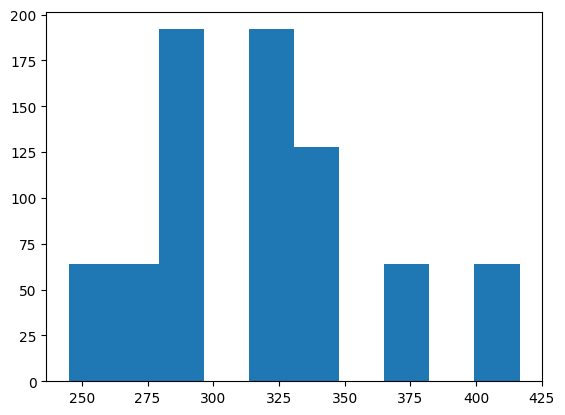

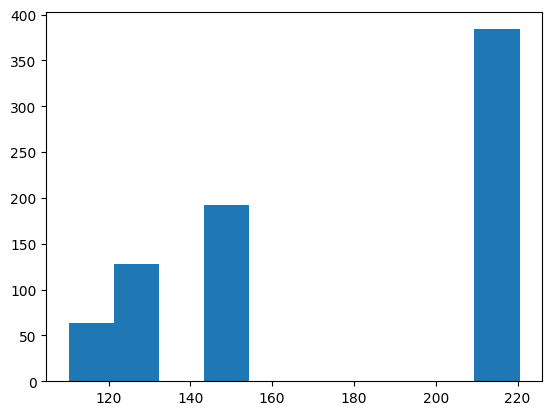

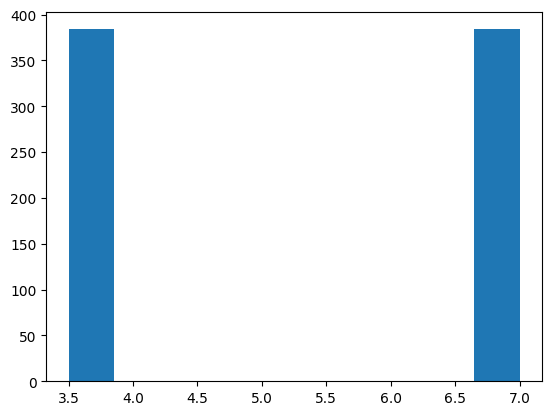

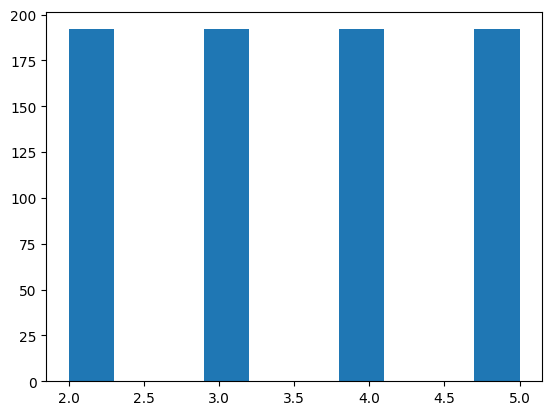

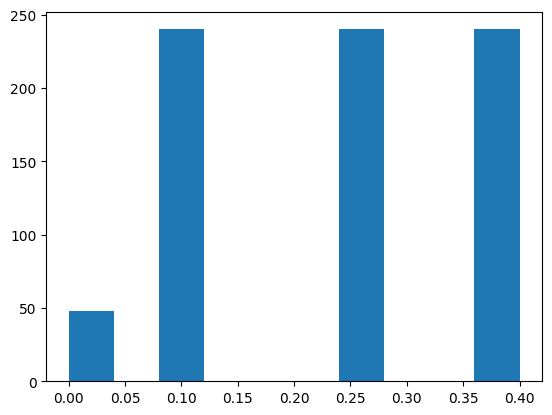

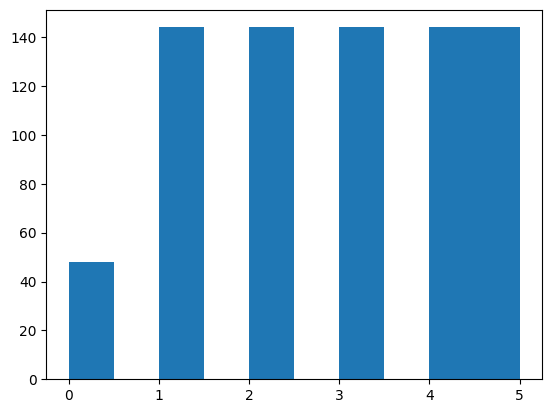

In [ ]:
plt.hist(df['X1'])
plt.show()
plt.hist(df['X2'])
plt.show()
plt.hist(df['X3'])
plt.show()
plt.hist(df['X4'])
plt.show()
plt.hist(df['X5'])
plt.show()
plt.hist(df['X6'])
plt.show()
plt.hist(df['X7'])
plt.show()
plt.hist(df['X8'])
plt.show()

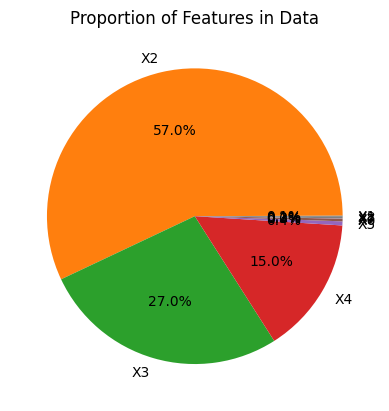

In [ ]:
df_sum = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']].sum()
plt.pie(df_sum, labels=df_sum.index, autopct='%1.1f%%')
plt.title("Proportion of Features in Data")
plt.show()


In [ ]:
df.isnull()

X1     X2     X3     X4     X5     X6     X7     X8     Y1     Y2
0    False  False  False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...
763  False  False  False  False  False  False  False  False  False  False
764  False  False  False  False  False  False  False  False  False  False
765  False  False  False  False  False  False  False  False  False  False
766  False  False  False  False  False  False  False  False  False  False
767  False  False  False  False  False  False  False  False  False  False

[768 rows x 10 columns]

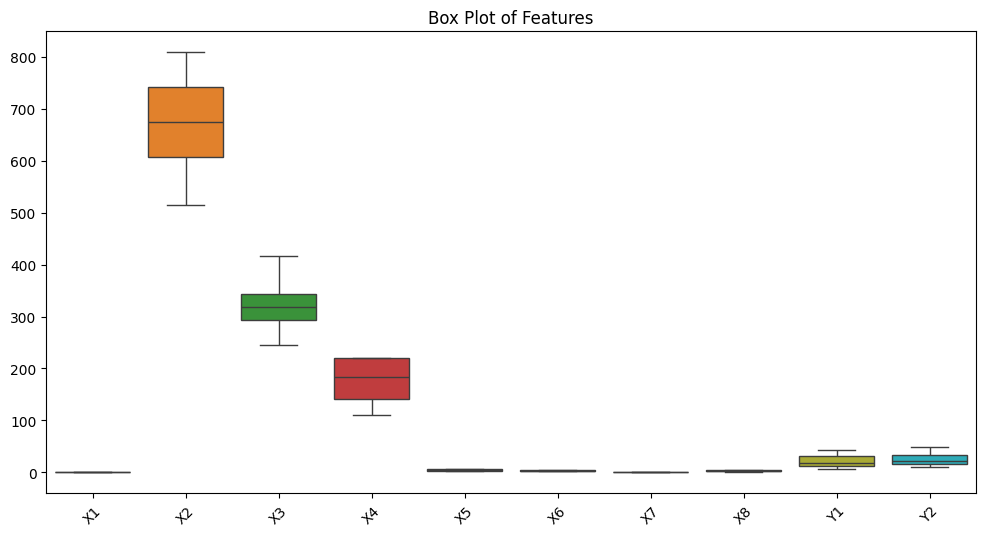

In [ ]:
# Box plot for all numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Box Plot of Features")
plt.show()




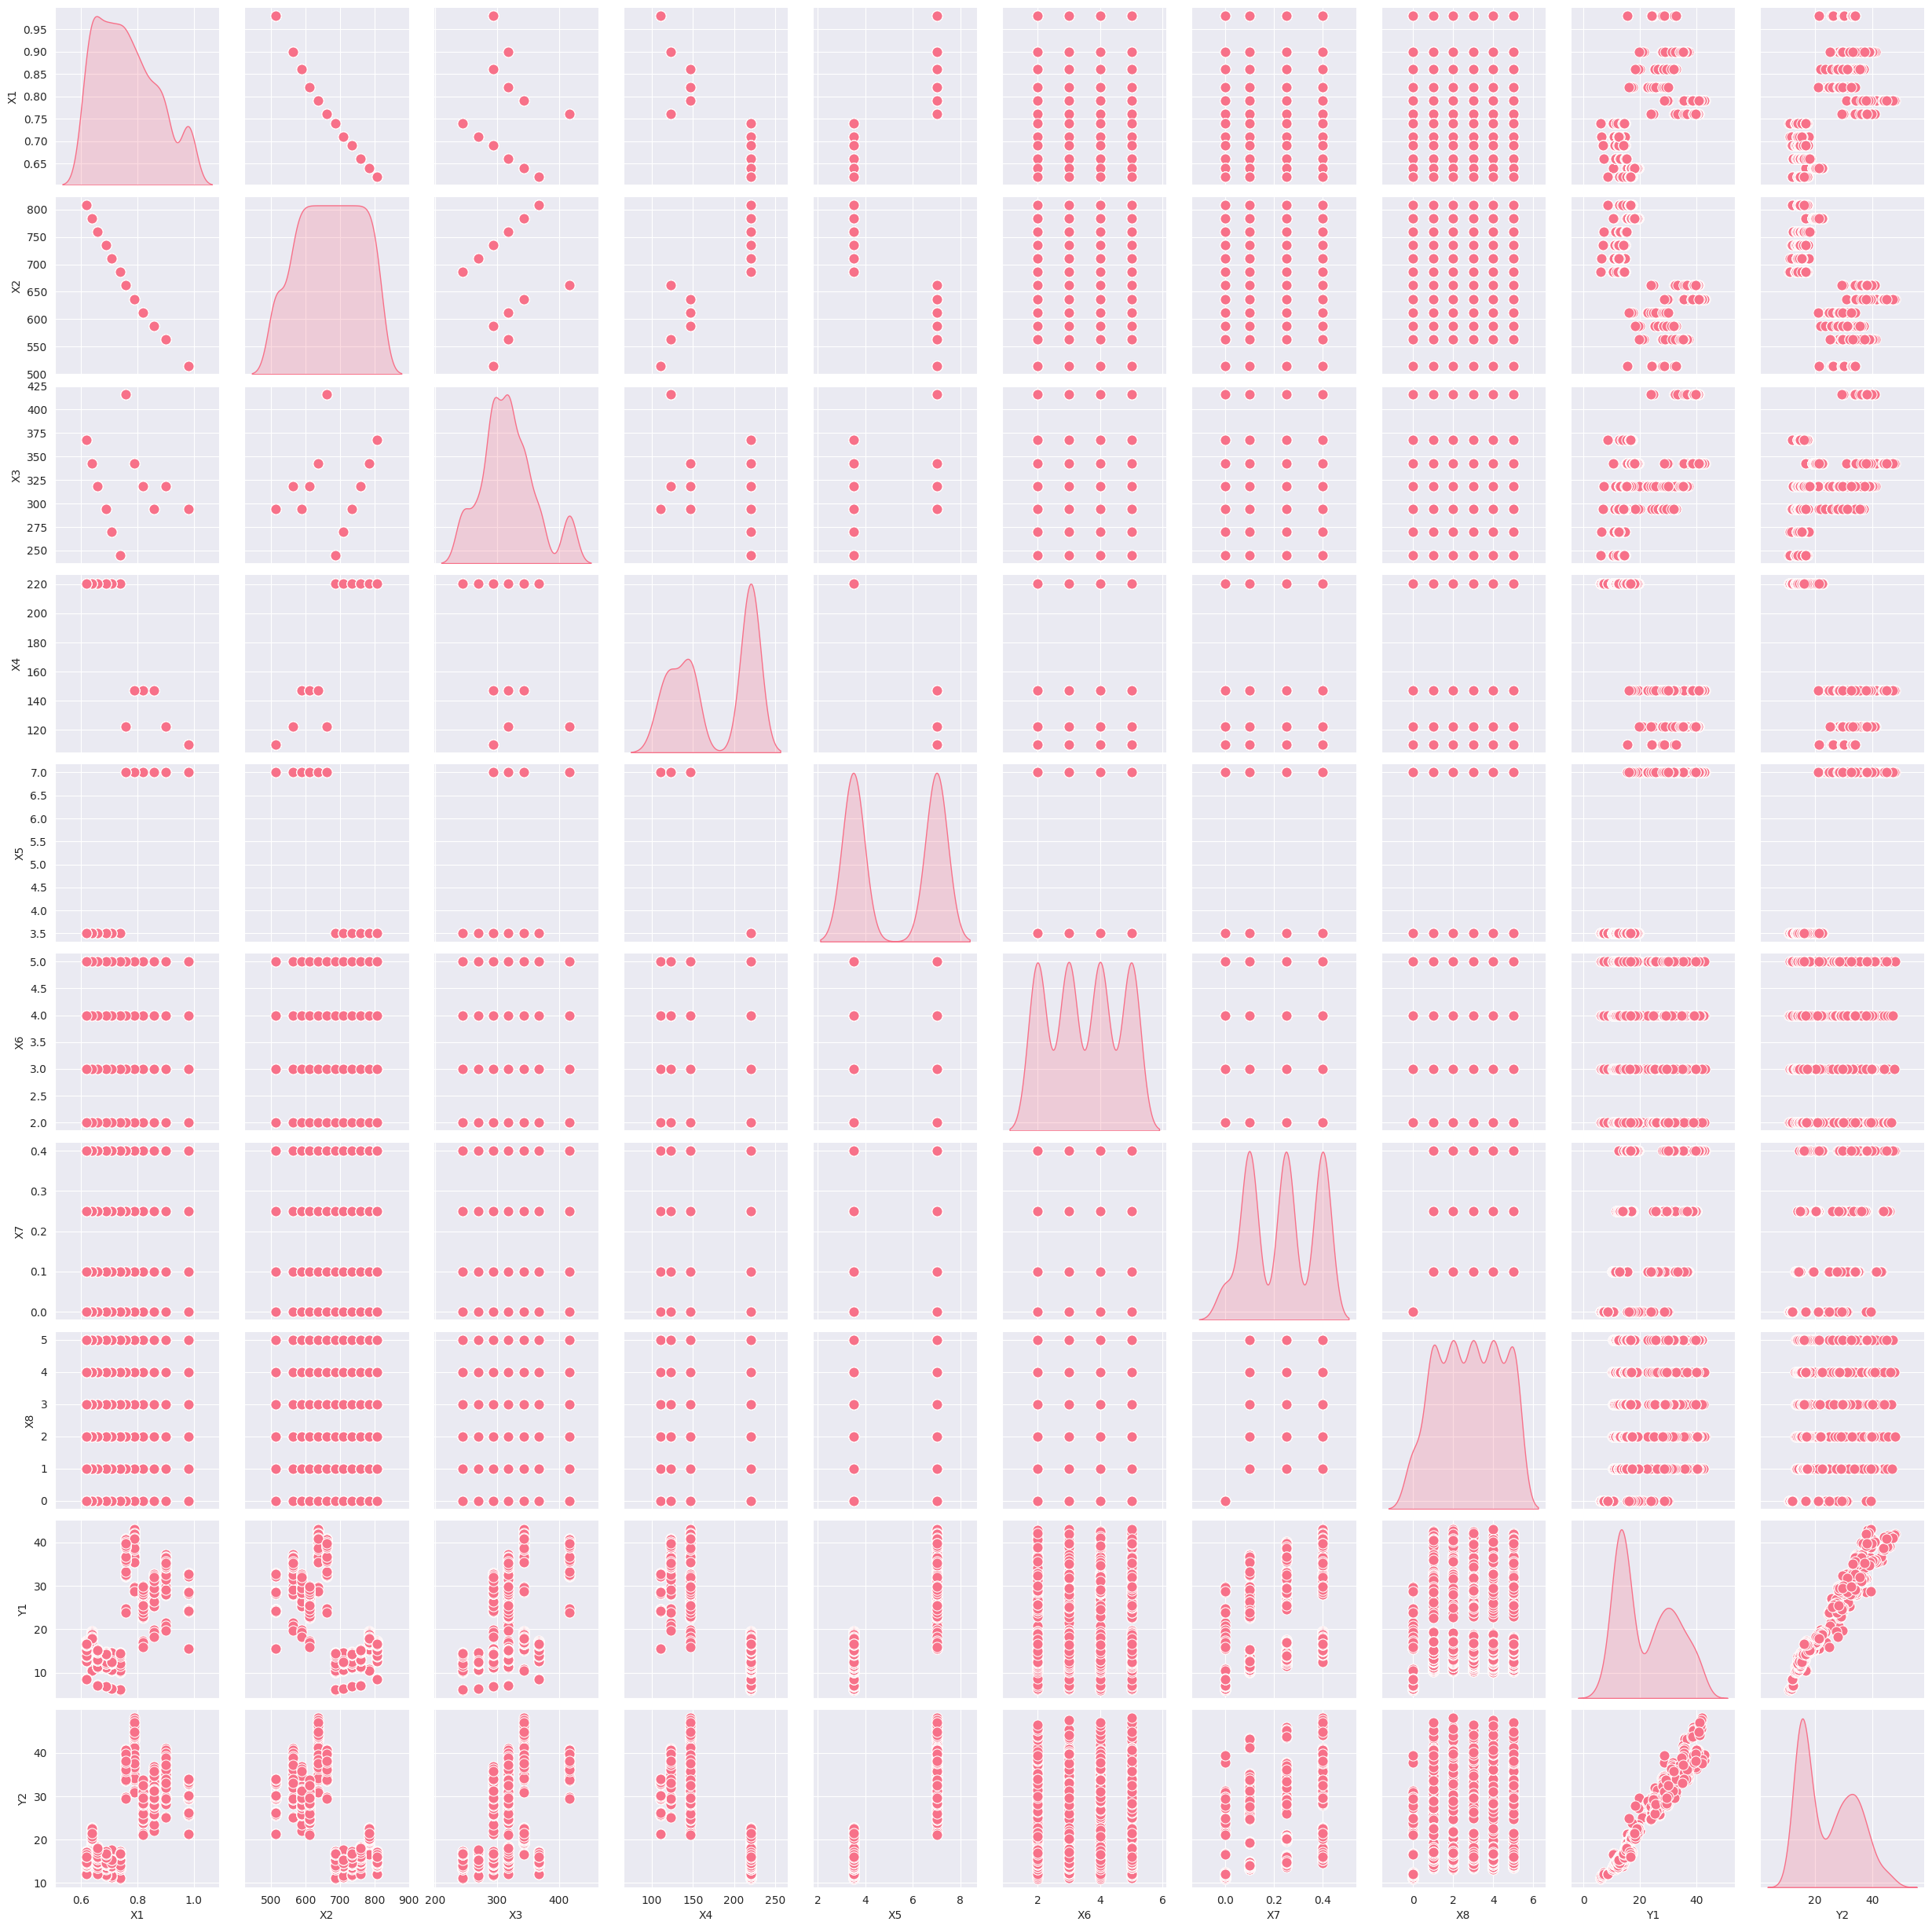

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and color palette
sns.set_style('darkgrid')
sns.set_palette("husl")  # You can also try "coolwarm", "viridis", "Set1", etc.

# Create the pairplot
sns.pairplot(df, plot_kws={'s': 90}, diag_kind="kde")  # KDE for diagonal plots
plt.show()



In [ ]:
# Compute the mean for columns X1 to X8
columns_of_interest = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
means = df[columns_of_interest].mean()

# Display the mean values
print("Mean values for X1 to X8:")
print(means)

Mean values for X1 to X8:
X1      0.764167
X2    671.708333
X3    318.500000
X4    176.604167
X5      5.250000
X6      3.500000
X7      0.234375
X8      2.812500
dtype: float64


In [ ]:
# Compute the median for columns X1 to X8
columns_of_interest = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
means = df[columns_of_interest].median()

# Display the median values
print("Mean values for X1 to X8:")
print(means)

Mean values for X1 to X8:
X1      0.75
X2    673.75
X3    318.50
X4    183.75
X5      5.25
X6      3.50
X7      0.25
X8      3.00
dtype: float64


In [ ]:
# Select columns X1 to X8
columns_of_interest = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

# Compute Variance and Standard Deviation
variance = df[columns_of_interest].var()
std_deviation = df[columns_of_interest].std()

# Display the results
print("Variance for X1 to X8:")
print(variance)

print("\nStandard Deviation for X1 to X8:")
print(std_deviation)

Variance for X1 to X8:
X1       0.011189
X2    7759.163842
X3    1903.269883
X4    2039.963060
X5       3.066493
X6       1.251630
X7       0.017748
X8       2.405476
dtype: float64

Standard Deviation for X1 to X8:
X1     0.105777
X2    88.086116
X3    43.626481
X4    45.165950
X5     1.751140
X6     1.118763
X7     0.133221
X8     1.550960
dtype: float64


In [ ]:
# Select columns X1 to X8
columns_of_interest = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

# Compute the Covariance Matrix
cov_matrix = df[columns_of_interest].cov()

# Display the results
print("Covariance Matrix for X1 to X8:")
print(cov_matrix)

Covariance Matrix for X1 to X8:
              X1            X2            X3            X4            X5  \
X1  1.118887e-02 -9.242069e+00 -9.403911e-01 -4.150839e+00  1.533246e-01   
X2 -9.242069e+00  7.759164e+03  7.512907e+02  3.503937e+03 -1.323703e+02   
X3 -9.403911e-01  7.512907e+02  1.903270e+03 -5.759896e+02  2.146545e+01   
X4 -4.150839e+00  3.503937e+03 -5.759896e+02  2.039963e+03 -7.691786e+01   
X5  1.533246e-01 -1.323703e+02  2.146545e+01 -7.691786e+01  3.066493e+00   
X6  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
X7  1.574143e-18 -2.658745e-15  4.574061e-17 -1.970899e-15 -2.894975e-19   
X8 -1.852784e-17 -4.861706e-14  0.000000e+00  1.541516e-14  0.000000e+00   

              X6            X7            X8  
X1  0.000000e+00  1.574143e-18 -1.852784e-17  
X2  0.000000e+00 -2.658745e-15 -4.861706e-14  
X3  0.000000e+00  4.574061e-17  0.000000e+00  
X4  0.000000e+00 -1.970899e-15  1.541516e-14  
X5  0.000000e+00 -2.894975e-19  0.000000e+00  
X

In [ ]:
# Select columns X1 to X8
columns_of_interest = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']

# Compute the Correlation Matrix
correlation_matrix = df[columns_of_interest].corr()

# Display the results
print("Correlation Matrix for X1 to X8:")
print(correlation_matrix)

Correlation Matrix for X1 to X8:
              X1            X2            X3            X4            X5  \
X1  1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01  8.277473e-01   
X2 -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01 -8.581477e-01   
X3 -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01  2.809757e-01   
X4 -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00 -9.725122e-01   
X5  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01  1.000000e+00   
X6  4.678592e-17 -3.459372e-17 -2.429499e-17 -5.830058e-17  4.492205e-17   
X7 -2.960552e-15  3.636925e-15 -8.567455e-17 -1.759011e-15  1.489134e-17   
X8 -7.107006e-16  2.438409e-15  2.067384e-16 -1.078071e-15 -2.920613e-17   

              X6            X7            X8  
X1  4.678592e-17 -2.960552e-15 -7.107006e-16  
X2 -3.459372e-17  3.636925e-15  2.438409e-15  
X3 -2.429499e-17 -8.567455e-17  2.067384e-16  
X4 -5.830058e-17 -1.759011e-15 -1.078071e-15  
X5  4.492205e-17  1.489134e-17 -2.920613e-17  


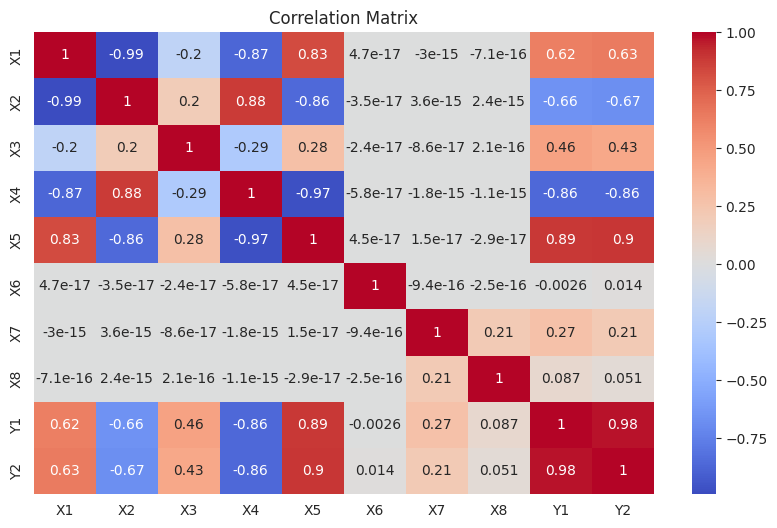

In [ ]:
# 2. جداسازی ویژگی‌ها و خروجی‌ها
X = df.iloc[:, :-2]  # ویژگی‌های ورودی
y_hl = df.iloc[:, -2]  # بار گرمایشی
y_cl = df.iloc[:, -1]  # بار سرمایشی

# 3. تحلیل آماری اولیه
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Detect outliers in X1 to X8
outliers_dict = detect_outliers_iqr(df, columns_of_interest)

# Create a summary of outliers found
outliers_summary = {col: len(outliers_dict[col]) for col in columns_of_interest}

# Convert to DataFrame for better visualization
outliers_df = pd.DataFrame(list(outliers_summary.items()), columns=['Feature', 'Number of Outliers'])

# Display the outlier summary
print("Outlier Summary for X1 to X8:")
print(outliers_df)


Outlier Summary for X1 to X8:
  Feature  Number of Outliers
0      X1                   0
1      X2                   0
2      X3                   0
3      X4                   0
4      X5                   0
5      X6                   0
6      X7                   0
7      X8                   0


In [ ]:
# نرمال‌سازی داده‌ها در بازه [0,1]
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

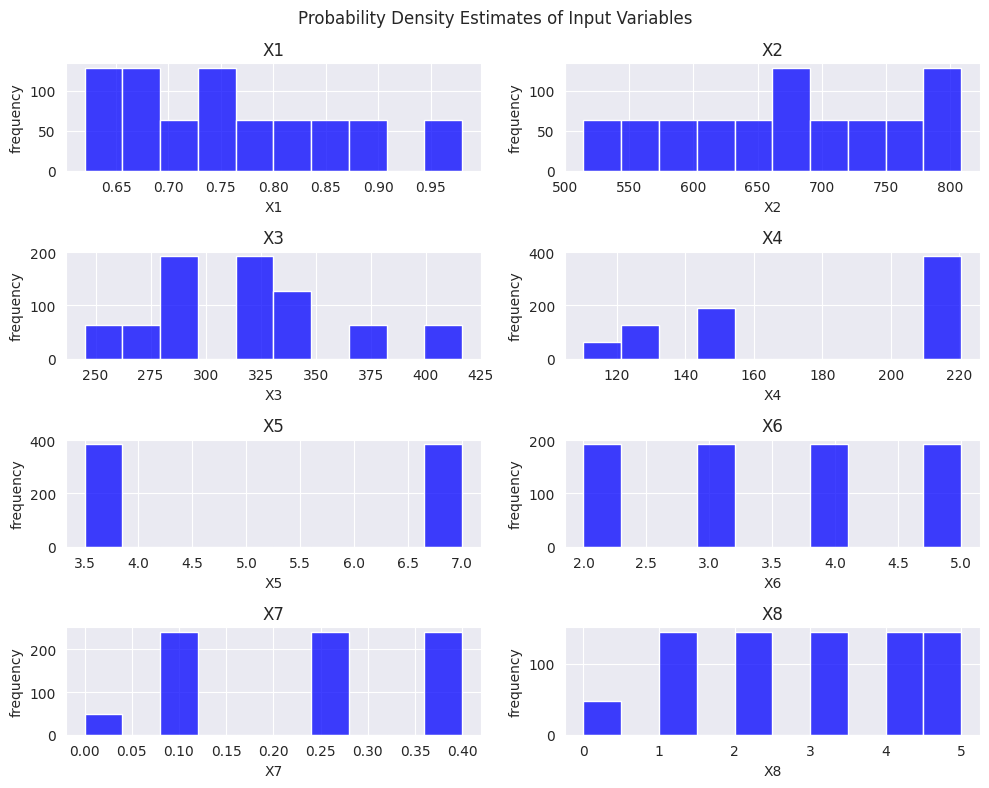

In [ ]:
# رسم هیستوگرام متغیرهای ورودی مشابه تصویر مرجع
fig, axes = plt.subplots(4, 2, figsize=(10, 8))
fig.suptitle("Probability Density Estimates of Input Variables")

for i, col in enumerate(df.columns[:8]):
    ax = axes[i // 2, i % 2]
    sns.histplot(df[col], bins=10, kde=False, ax=ax, color='blue')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("frequency")

plt.tight_layout()
plt.show()

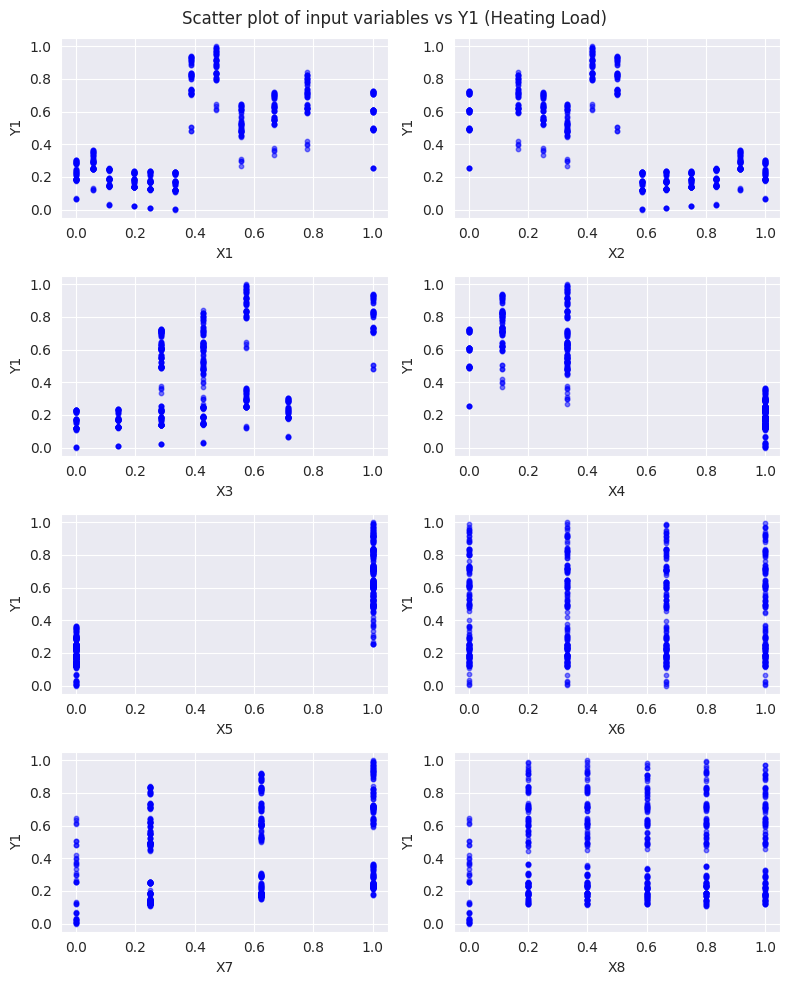

In [ ]:
# رسم نمودار پراکندگی برای Y1
fig, axes = plt.subplots(4, 2, figsize=(8, 10))
fig.suptitle("Scatter plot of input variables vs Y1 (Heating Load)")

for i, col in enumerate(df_normalized.columns[:8]):
    ax = axes[i // 2, i % 2]
    ax.scatter(df_normalized[col], df_normalized["Y1"], alpha=0.5, color='blue', s=10)
    ax.set_xlabel(col)
    ax.set_ylabel("Y1")
    ax.grid(True)

plt.tight_layout()
plt.show()

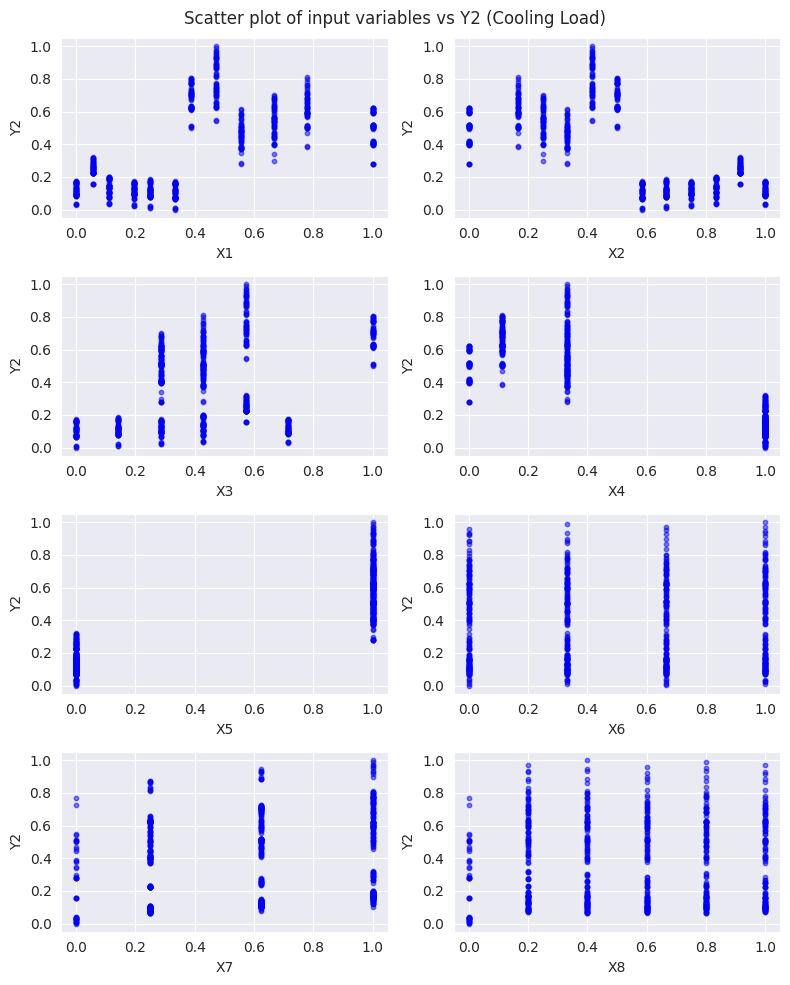

In [ ]:
# رسم نمودار پراکندگی برای Y2
fig, axes = plt.subplots(4, 2, figsize=(8, 10))
fig.suptitle("Scatter plot of input variables vs Y2 (Cooling Load)")

for i, col in enumerate(df_normalized.columns[:8]):
    ax = axes[i // 2, i % 2]
    ax.scatter(df_normalized[col], df_normalized["Y2"], alpha=0.5, color='blue', s=10)
    ax.set_xlabel(col)
    ax.set_ylabel("Y2")
    ax.grid(True)

plt.tight_layout()
plt.show()

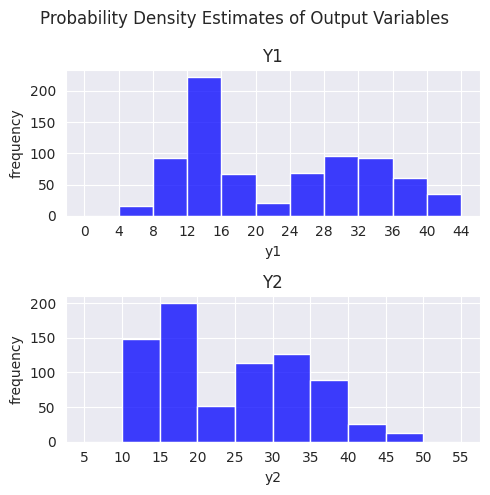

In [ ]:
# رسم هیستوگرام متغیرهای خروجی مشابه تصویر مرجع
fig, axes = plt.subplots(2, 1, figsize=(5,5))
fig.suptitle("Probability Density Estimates of Output Variables")

bins = [0,4,8,12,16,20,24,28,32,36,40,44]
b =[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
sns.histplot(df["Y1"], bins=bins, kde=False, ax=axes[0], color='blue')
axes[0].set_title("Y1")
axes[0].set_xlabel("y1")
axes[0].set_ylabel("frequency")
axes[0].set_xticks(bins)

sns.histplot(df["Y2"], bins=b, kde=False, ax=axes[1], color='blue')
axes[1].set_title("Y2")
axes[1].set_xlabel("y2")
axes[1].set_ylabel("frequency")
axes[1].set_xticks(b)

plt.tight_layout()
plt.show()

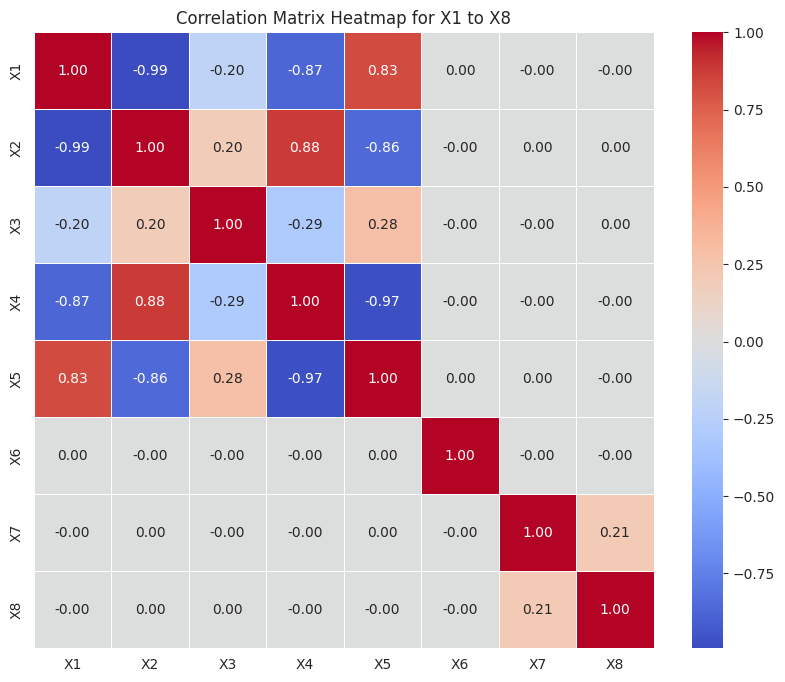

In [ ]:

columns_of_interest = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
d= df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
# Compute the Correlation Matrix
correlation_matrix = d[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap for X1 to X8")
plt.show()

In [ ]:
# محاسبه همبستگی اسپیرمن برای Y1
correlations_y1 = {}
p_values_y1 = {}
for col in df.columns[:8]:  # اولین ۸ ویژگی (X1 تا X8)
    corr, p_value = spearmanr(df[col], df["Y1"])
    correlations_y1[col] = corr
    p_values_y1[col] = p_value

df_corr_y1 = pd.DataFrame({"Feature": df.columns[:8],
                           "Spearman Correlation with Y1": list(correlations_y1.values()),
                           "p-value": list(p_values_y1.values())})
df_corr_y1_sorted = df_corr_y1.sort_values(by="Spearman Correlation with Y1", ascending=False)

print("\nSpearman Correlation with Y1:")
print(df_corr_y1_sorted.to_string(index=False))


Spearman Correlation with Y1:
Feature  Spearman Correlation with Y1       p-value
     X5                      0.861283 1.989000e-227
     X1                      0.622135  1.771224e-83
     X3                      0.471458  9.359216e-44
     X7                      0.322860  4.320873e-20
     X8                      0.068343  5.834211e-02
     X6                     -0.004163  9.083001e-01
     X2                     -0.622135  1.771224e-83
     X4                     -0.804027 4.039675e-175


In [ ]:
# محاسبه همبستگی اسپیرمن برای Y2
correlations_y2 = {}
p_values_y2 = {}
for col in df.columns[:8]:  # اولین ۸ ویژگی (X1 تا X8)
    corr, p_value = spearmanr(df[col], df["Y2"])
    correlations_y2[col] = corr
    p_values_y2[col] = p_value

df_corr_y2 = pd.DataFrame({"Feature": df.columns[:8],
                           "Spearman Correlation with Y2": list(correlations_y2.values()),
                           "p-value": list(p_values_y2.values())})
df_corr_y2_sorted = df_corr_y2.sort_values(by="Spearman Correlation with Y2", ascending=False)

print("\nSpearman Correlation with Y2:")
print(df_corr_y2_sorted.to_string(index=False))


Spearman Correlation with Y2:
Feature  Spearman Correlation with Y2       p-value
     X5                      0.864876 1.786091e-231
     X1                      0.651019  8.654994e-94
     X3                      0.415991  1.709338e-33
     X7                      0.288904  3.132343e-16
     X8                      0.046477  1.982317e-01
     X6                      0.017606  6.261545e-01
     X2                     -0.651019  8.654994e-94
     X4                     -0.803175 1.778790e-174


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
from itertools import combinations

# انتخاب تمام ویژگی‌های عددی (مثلاً X1 تا X8)
features = df.columns.tolist()

# لیست برای ذخیره نتایج
results = []

# ایجاد تمام ترکیب‌های ممکن از ویژگی‌ها بدون تکرار
for feature1, feature2 in combinations(features, 2):  # همه جفت‌های یکتا
    t = pd.crosstab(df[feature1], df[feature2])
    chi2, p_value, dof, _ = chi2_contingency(t.values)
    results.append({
        'Feature 1': feature1,
        'Feature 2': feature2,
        'Chi-square': chi2,
        'P-value': p_value,
        'Degrees of freedom': dof
    })

# تبدیل نتایج به DataFrame برای نمایش بهتر
results_df = pd.DataFrame(results)

# نمایش جدول نهایی
print(results_df)


   Feature 1 Feature 2     Chi-square        P-value  Degrees of freedom
0         X1        X2    8448.000000   0.000000e+00                 121
1         X1        X3    4608.000000   0.000000e+00                  66
2         X1        X4    2304.000000   0.000000e+00                  33
3         X1        X5     768.000000  1.401712e-157                  11
4         X1        X6       0.000000   1.000000e+00                  33
5         X1        X7       0.000000   1.000000e+00                  33
6         X1        X8       0.000000   1.000000e+00                  55
7         X1        Y1    7439.200000   1.656177e-17                6435
8         X1        Y2    7462.000000   3.859675e-05                6985
9         X2        X3    4608.000000   0.000000e+00                  66
10        X2        X4    2304.000000   0.000000e+00                  33
11        X2        X5     768.000000  1.401712e-157                  11
12        X2        X6       0.000000   1.000000e+0

In [ ]:
import numpy as np
import pandas as pd
from math import log2
from scipy.stats import spearmanr


def discretize_series(series, n_bins=10, method='cut'):

    if method == 'cut':
        return pd.cut(series, bins=n_bins, labels=False, include_lowest=True)
    elif method == 'qcut':
        return pd.qcut(series, q=n_bins, labels=False, duplicates='drop')
    else:
        raise ValueError("method must be 'cut' or 'qcut'.")

def compute_entropy(counts):
    """محاسبه آنتروپی از روی فراوانی (counts)."""
    total = np.sum(counts)
    p = counts / total
    p = p[p>0]  # حذف فراوانی‌های صفر برای جلوگیری از log(0)
    return -np.sum(p * np.log2(p))

def compute_mutual_information(x, y, n_bins=10, bin_method='cut'):
    """
    محاسبه MI کلاسیک: I(X;Y) = H(X)+H(Y)-H(X,Y)
    ابتدا x,y را گسسته‌سازی می‌کنیم سپس آنتروپی‌ها را حساب می‌کنیم.
    """
    x_disc = discretize_series(x, n_bins, bin_method)
    y_disc = discretize_series(y, n_bins, bin_method)

    xy_counts = pd.crosstab(x_disc, y_disc)  # جدول فراوانی مشترک
    x_counts = xy_counts.sum(axis=1)
    y_counts = xy_counts.sum(axis=0)

    Hx  = compute_entropy(x_counts.values)
    Hy  = compute_entropy(y_counts.values)
    Hxy = compute_entropy(xy_counts.values.ravel())

    return Hx + Hy - Hxy

def normalized_mutual_information(x, y, n_bins=10, bin_method='cut', norm_method='max'):
    """
    محاسبه NMI با سه فرمول متداول:
      - 'max' : NMI = I(X;Y) / max(H(X), H(Y))
      - 'avg' : NMI = 2*I(X;Y) / (H(X)+H(Y))
      - 'sqrt': NMI = I(X;Y) / sqrt(H(X)*H(Y))
    """
    mi = compute_mutual_information(x, y, n_bins, bin_method)

    x_disc = discretize_series(x, n_bins, bin_method)
    y_disc = discretize_series(y, n_bins, bin_method)
    x_counts = x_disc.value_counts()
    y_counts = y_disc.value_counts()
    Hx = compute_entropy(x_counts.values)
    Hy = compute_entropy(y_counts.values)

    if norm_method == 'max':
        denom = max(Hx, Hy)
    elif norm_method == 'avg':
        denom = 0.5 * (Hx + Hy)
    elif norm_method == 'sqrt':
        denom = np.sqrt(Hx*Hy)
    else:
        raise ValueError("norm_method must be in {'max','avg','sqrt'}.")

    return mi / denom if denom != 0 else 0


# مشخص‌کردن نام ستون‌های ورودی و خروجی
X_cols = df.columns[:8]  # X1..X8
Y1_col = df.columns[8]   # Y1
Y2_col = df.columns[9]   # Y2

# پارامترهای تنظیمی:
n_bins       = 10
bin_method   = 'cut'
nmi_method   = 'max'

results = []
for feature in X_cols:
    # MI & NMI با Y1
    mi_y1 = compute_mutual_information(df[feature], df[Y1_col], n_bins, bin_method)
    nmi_y1 = normalized_mutual_information(df[feature], df[Y1_col],
                                           n_bins, bin_method, norm_method=nmi_method)
    # MI & NMI با Y2
    mi_y2 = compute_mutual_information(df[feature], df[Y2_col], n_bins, bin_method)
    nmi_y2 = normalized_mutual_information(df[feature], df[Y2_col],
                                           n_bins, bin_method, norm_method=nmi_method)


    results.append({
        'Feature'           : feature,
        'MI_with_Y1'        : mi_y1,
        'NMI_with_Y1'       : nmi_y1,
        'MI_with_Y2'        : mi_y2,
        'NMI_with_Y2'       : nmi_y2
    })

df_results = pd.DataFrame(results)
print(df_results.sort_values(by="NMI_with_Y1", ascending=False))


  Feature  MI_with_Y1  NMI_with_Y1  MI_with_Y2  NMI_with_Y2
1      X2    1.413103     0.434583    1.390882     0.427749
0      X1    1.270942     0.411980    1.253338     0.406273
3      X4    1.032066     0.339541    1.054387     0.352951
4      X5    0.909420     0.299191    0.927080     0.310335
2      X3    0.753506     0.247897    0.873982     0.292561
6      X7    0.521147     0.171453    0.364463     0.122002
7      X8    0.156430     0.051464    0.057102     0.019115
5      X6    0.002310     0.000760    0.005979     0.002001


### run code to see output of the article

IRLS - Heating Load (y1):
MAE: 2.03 ± 0.24
MSE: 8.89 ± 1.88
MRE: 9.43% ± 0.98%

IRLS - Cooling Load (y2):
MAE: 2.20 ± 0.26
MSE: 10.70 ± 2.51
MRE: 8.44% ± 0.81%

Random Forest - Heating Load (y1):
MAE: 0.31 ± 0.04
MSE: 0.22 ± 0.06
MRE: 1.33% ± 0.17%

Random Forest - Cooling Load (y2):
MAE: 0.99 ± 0.15
MSE: 2.71 ± 0.73
MRE: 3.40% ± 0.42%

Feature Importances (Heating Load, mean ± std) - مطابق مقاله:
Relative Compactness: 15.29 ± 3.84
Surface Area: 32.72 ± 5.66
Wall Area: 3.70 ± 0.46
Roof Area: 28.57 ± 4.91
Overall Height: 10.70 ± 3.47
Orientation: 0.07 ± 0.00
Glazing Area: 7.63 ± 0.25
Glazing Area Distribution: 1.31 ± 0.14

Feature Importances (Cooling Load, mean ± std) - مطابق مقاله:
Relative Compactness: 41.29 ± 5.23
Surface Area: 14.06 ± 3.69
Wall Area: 4.34 ± 0.49
Roof Area: 6.48 ± 2.68
Overall Height: 26.24 ± 5.08
Orientation: 1.25 ± 0.04
Glazing Area: 4.73 ± 0.17
Glazing Area Distribution: 1.62 ± 0.05


<ipython-input-31-d826b0920880>:144: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi_hl_mean_scaled, y=features, palette="viridis")


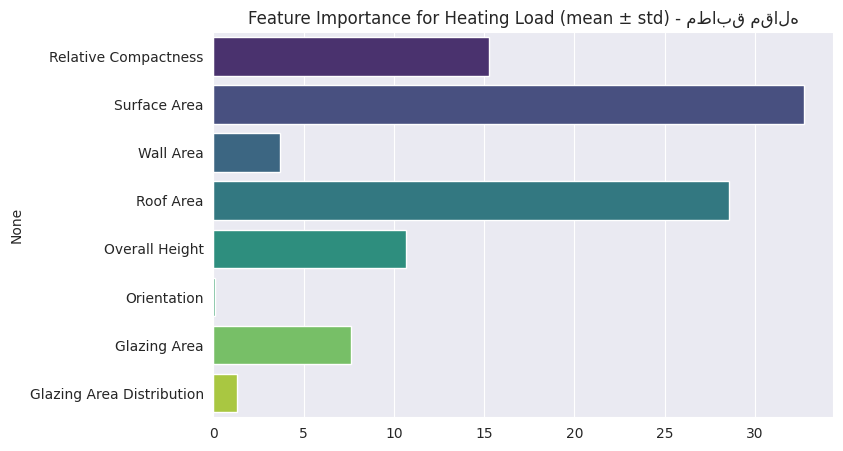

<ipython-input-31-d826b0920880>:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi_cl_mean_scaled, y=features, palette="magma")


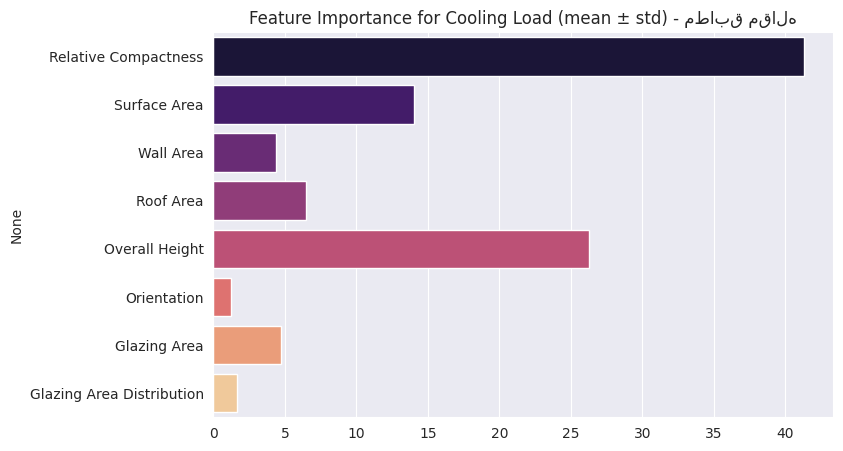

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RepeatedKFold

# ---------------------------------------------------
# 1) آماده‌سازی داده‌ها
# ---------------------------------------------------
df = df.iloc[:768, :10]  # محدود کردن به 768 نمونه و 10 ویژگی

# نام‌گذاری ستون‌ها (طبق مقاله)
columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
           "Overall Height", "Orientation", "Glazing Area",
           "Glazing Area Distribution", "Heating Load", "Cooling Load"]
df.columns = columns

# جداسازی ویژگی‌ها و خروجی‌ها
X = df.iloc[:, :-2]
y_hl = df["Heating Load"]   # Y1
y_cl = df["Cooling Load"]   # Y2

# مقیاس‌بندی داده‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------
# 2) تابع عمومی برای اجرای 10-Fold CV با 100 تکرار
# ---------------------------------------------------
def repeated_cv_model(model, X, y, n_splits=10, n_repeats=100, random_state=42):
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

    mae_list, mse_list, mre_list = [], [], []
    fi_list = []  # برای ذخیرهٔ اهمیت ویژگی در هر تکرار (درصورت وجود)

    for train_idx, test_idx in rkf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mre = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # جلوگیری از تقسیم صفر

        mae_list.append(mae)
        mse_list.append(mse)
        mre_list.append(mre)

        if hasattr(model, "feature_importances_"):
            fi_list.append(model.feature_importances_)

    mae_mean, mae_std = np.mean(mae_list), np.std(mae_list)
    mse_mean, mse_std = np.mean(mse_list), np.std(mse_list)
    mre_mean, mre_std = np.mean(mre_list), np.std(mre_list)

    if len(fi_list) > 0:
        fi_array = np.array(fi_list)
        fi_mean = np.mean(fi_array, axis=0)
        fi_std = np.std(fi_array, axis=0)
    else:
        fi_mean, fi_std = None, None

    return (mae_mean, mae_std), (mse_mean, mse_std), (mre_mean, mre_std), (fi_mean, fi_std)


# ---------------------------------------------------
# 3) اجرای مدل‌ها:
# ---------------------------------------------------
# مدل IRLS
irls = HuberRegressor(max_iter=1000)

# (a) IRLS for Heating Load
(mae_hl, mae_hl_std), (mse_hl, mse_hl_std), (mre_hl, mre_hl_std), _ = \
    repeated_cv_model(irls, X_scaled, y_hl)

print("IRLS - Heating Load (y1):")
print(f"MAE: {mae_hl:.2f} ± {mae_hl_std:.2f}")
print(f"MSE: {mse_hl:.2f} ± {mse_hl_std:.2f}")
print(f"MRE: {mre_hl:.2f}% ± {mre_hl_std:.2f}%\n")

# (b) IRLS for Cooling Load
(mae_cl, mae_cl_std), (mse_cl, mse_cl_std), (mre_cl, mre_cl_std), _ = \
    repeated_cv_model(irls, X_scaled, y_cl)

print("IRLS - Cooling Load (y2):")
print(f"MAE: {mae_cl:.2f} ± {mae_cl_std:.2f}")
print(f"MSE: {mse_cl:.2f} ± {mse_cl_std:.2f}")
print(f"MRE: {mre_cl:.2f}% ± {mre_cl_std:.2f}%\n")


# مدل RF
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# (c) RF for Heating Load
(mae_hl_rf, mae_hl_rf_std), (mse_hl_rf, mse_hl_rf_std), (mre_hl_rf, mre_hl_rf_std), (fi_hl_mean, fi_hl_std) = \
    repeated_cv_model(rf, X_scaled, y_hl)

print("Random Forest - Heating Load (y1):")
print(f"MAE: {mae_hl_rf:.2f} ± {mae_hl_rf_std:.2f}")
print(f"MSE: {mse_hl_rf:.2f} ± {mse_hl_rf_std:.2f}")
print(f"MRE: {mre_hl_rf:.2f}% ± {mre_hl_rf_std:.2f}%\n")

# (d) RF for Cooling Load
(mae_cl_rf, mae_cl_rf_std), (mse_cl_rf, mse_cl_rf_std), (mre_cl_rf, mre_cl_rf_std), (fi_cl_mean, fi_cl_std) = \
    repeated_cv_model(rf, X_scaled, y_cl)

print("Random Forest - Cooling Load (y2):")
print(f"MAE: {mae_cl_rf:.2f} ± {mae_cl_rf_std:.2f}")
print(f"MSE: {mse_cl_rf:.2f} ± {mse_cl_rf_std:.2f}")
print(f"MRE: {mre_cl_rf:.2f}% ± {mre_cl_rf_std:.2f}%\n")

# ---------------------------------------------------
# 4) گزارش اهمیت ویژگی در RF (میانگین ± انحراف معیار) **مطابق مقاله**
# ---------------------------------------------------
if fi_hl_mean is not None:
    # تبدیل مقیاس برای هماهنگی با مقاله (ضرب در 100)
    fi_hl_mean_scaled = fi_hl_mean * 100
    fi_hl_std_scaled = fi_hl_std * 100
    fi_cl_mean_scaled = fi_cl_mean * 100
    fi_cl_std_scaled = fi_cl_std * 100

    # تعریف features برای جلوگیری از خطا
    features = X.columns

    print("Feature Importances (Heating Load, mean ± std) - مطابق مقاله:")
    for f, m, s in zip(features, fi_hl_mean_scaled, fi_hl_std_scaled):
        print(f"{f}: {m:.2f} ± {s:.2f}")

    print("\nFeature Importances (Cooling Load, mean ± std) - مطابق مقاله:")
    for f, m, s in zip(features, fi_cl_mean_scaled, fi_cl_std_scaled):
        print(f"{f}: {m:.2f} ± {s:.2f}")

# ---------------------------------------------------
# 5) رسم نمودار اهمیت ویژگی‌ها (اختیاری)
# ---------------------------------------------------
plt.figure(figsize=(8, 5))
sns.barplot(x=fi_hl_mean_scaled, y=features, palette="viridis")
plt.title("Feature Importance for Heating Load (mean ± std) - مطابق مقاله")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=fi_cl_mean_scaled, y=features, palette="magma")
plt.title("Feature Importance for Cooling Load (mean ± std) - مطابق مقاله")
plt.show()


## Output: Report mean and best RMSE for predicting each of the y1 and y2 on 20% of randomly selected data records

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# تعداد تکرارها برای انتخاب داده‌های تست تصادفی
num_repeats = 100

# لیست‌ها برای ذخیره مقدار RMSE در هر اجرا
rmse_hl_irls_list, rmse_cl_irls_list = [], []
rmse_hl_rf_list, rmse_cl_rf_list = [], []

for _ in range(num_repeats):
    # تقسیم تصادفی داده‌ها (80% train, 20% test)
    X_train, X_test, y_hl_train, y_hl_test, y_cl_train, y_cl_test = train_test_split(
        X_scaled, y_hl, y_cl, test_size=0.2, random_state=np.random.randint(10000)
    )

    # آموزش مدل IRLS (HuberRegressor)
    irls.fit(X_train, y_hl_train)
    y_hl_pred_irls = irls.predict(X_test)
    irls.fit(X_train, y_cl_train)
    y_cl_pred_irls = irls.predict(X_test)

    # آموزش مدل Random Forest
    rf.fit(X_train, y_hl_train)
    y_hl_pred_rf = rf.predict(X_test)
    rf.fit(X_train, y_cl_train)
    y_cl_pred_rf = rf.predict(X_test)

    # محاسبه RMSE
    rmse_hl_irls = np.sqrt(mean_squared_error(y_hl_test, y_hl_pred_irls))
    rmse_cl_irls = np.sqrt(mean_squared_error(y_cl_test, y_cl_pred_irls))
    rmse_hl_rf = np.sqrt(mean_squared_error(y_hl_test, y_hl_pred_rf))
    rmse_cl_rf = np.sqrt(mean_squared_error(y_cl_test, y_cl_pred_rf))

    # ذخیره مقادیر
    rmse_hl_irls_list.append(rmse_hl_irls)
    rmse_cl_irls_list.append(rmse_cl_irls)
    rmse_hl_rf_list.append(rmse_hl_rf)
    rmse_cl_rf_list.append(rmse_cl_rf)

# گزارش میانگین و بهترین (کمترین) RMSE برای هر مدل
print("\nFinal RMSE Report (mean ± std deviation & best value):")
print(f"IRLS - Heating Load:  {np.mean(rmse_hl_irls):.2f} ± {np.std(rmse_hl_irls):.2f} (Best: {np.min(rmse_hl_irls_list):.2f})")
print(f"IRLS - Cooling Load:  {np.mean(rmse_cl_irls):.2f} ± {np.std(rmse_cl_irls):.2f} (Best: {np.min(rmse_cl_irls_list):.2f})")
print(f"RF - Heating Load:     {np.mean(rmse_hl_rf):.2f} ± {np.std(rmse_hl_rf):.2f} (Best: {np.min(rmse_hl_rf_list):.2f})")
print(f"RF - Cooling Load:     {np.mean(rmse_cl_rf):.2f} ± {np.std(rmse_cl_rf):.2f} (Best: {np.min(rmse_cl_rf_list):.2f})")



Final RMSE Report (mean ± std deviation & best value):
IRLS - Heating Load:  3.41 ± 0.00 (Best: 2.49)
IRLS - Cooling Load:  3.29 ± 0.00 (Best: 2.56)
RF - Heating Load:     0.51 ± 0.00 (Best: 0.40)
RF - Cooling Load:     1.81 ± 0.00 (Best: 1.37)


### version 2 - compair the output my code with article


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import HuberRegressor  # برای IRLS
from scipy.stats import randint, uniform

# -------------------------
# 1. بارگذاری و آماده‌سازی داده‌ها
# -------------------------
file_path = "/content/ENB2012_data.csv"
df1 = pd.read_csv(file_path)

# انتخاب 768 سطر اول و 10 ستون اول
df = df1.iloc[:768, :10]

# نام‌گذاری ستون‌ها (مطابق مقاله)
columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
           "Overall Height", "Orientation", "Glazing Area",
           "Glazing Area Distribution", "Heating Load", "Cooling Load"]
df.columns = columns

# تعریف ویژگی‌ها و خروجی‌ها
X = df.iloc[:, :8].values         # 8 ویژگی اول
y_hl = df["Heating Load"].values  # خروجی Heating Load (y1)
y_cl = df["Cooling Load"].values  # خروجی Cooling Load (y2)

# تقسیم اولیه برای بخش بهینه‌سازی: 80% آموزش و 20% تست
X_train, X_test, y_hl_train, y_hl_test, y_cl_train, y_cl_test = train_test_split(
    X, y_hl, y_cl, test_size=0.2, random_state=42
)

# -------------------------
# 2. توابع کمکی برای محاسبه معیارها و بهینه‌سازی
# -------------------------
def compute_metrics(y_true, y_pred):
    """محاسبه معیارهای رایج رگرسیون."""
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mre = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # میانگین خطای نسبی (%)
    return mae, mse, rmse, mre

def tune_and_evaluate(model, param_dist, X_train, y_train, X_test, y_test):
    """
    ایجاد یک pipeline شامل استانداردسازی و مدل رگرسیون داده‌شده،
    سپس استفاده از RandomizedSearchCV با Cross-validation تکراری جهت بهینه‌سازی
    و ارزیابی مدل روی مجموعه تست.
    """
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    # استفاده از RepeatedKFold برای اعتبارسنجی
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=50,
        cv=cv,
        scoring='neg_mean_squared_error',
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test)
    mae, mse, rmse, mre = compute_metrics(y_test, y_pred)
    return search.best_params_, mae, mse, rmse, mre, best_model

# -------------------------
# 3. تنظیم توزیع‌های ابرپارامترها
# -------------------------
# برای Random Forest
param_dist_rf = {
    'regressor__n_estimators': randint(100, 500),
    'regressor__max_depth': [None] + list(range(5, 31, 5)),
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 10),
    'regressor__max_features': ['sqrt', 'log2', None]
}

# برای Gradient Boosting
param_dist_gb = {
    'regressor__n_estimators': randint(100, 500),
    'regressor__learning_rate': uniform(0.01, 0.3),
    'regressor__max_depth': randint(3, 10),
    'regressor__min_samples_split': randint(2, 10),
    'regressor__min_samples_leaf': randint(1, 10),
    'regressor__subsample': uniform(0.5, 0.5)
}

# برای Iteratively Reweighted Least Squares (IRLS) با HuberRegressor
param_dist_irls = {
    'regressor__epsilon': uniform(1.1, 0.9),   # نمونه در بازه [1.1, 2.0]
    'regressor__alpha': uniform(1e-5, 1e-3),     # نمونه در بازه [1e-5, ~0.001]
    'regressor__max_iter': [100, 200, 500]
}

# -------------------------
# 4. بهینه‌سازی ابرپارامترها و ارزیابی مدل‌ها
# -------------------------
print("=== Tuning and Evaluation for Heating Load ===")
# (A) Random Forest برای Heating Load
print("Tuning Random Forest for Heating Load...")
best_params_rf_hl, mae_rf_hl, mse_rf_hl, rmse_rf_hl, mre_rf_hl, best_rf_model_hl = tune_and_evaluate(
    RandomForestRegressor(random_state=42), param_dist_rf,
    X_train, y_hl_train, X_test, y_hl_test
)
print("Best Parameters (RF Heating Load):", best_params_rf_hl)
print(f"RF Heating Load - MAE: {mae_rf_hl:.2f}, MSE: {mse_rf_hl:.2f}, RMSE: {rmse_rf_hl:.2f}, MRE: {mre_rf_hl:.2f}%\n")

# (B) Gradient Boosting برای Heating Load
print("Tuning Gradient Boosting for Heating Load...")
best_params_gb_hl, mae_gb_hl, mse_gb_hl, rmse_gb_hl, mre_gb_hl, best_gb_model_hl = tune_and_evaluate(
    GradientBoostingRegressor(random_state=42), param_dist_gb,
    X_train, y_hl_train, X_test, y_hl_test
)
print("Best Parameters (GB Heating Load):", best_params_gb_hl)
print(f"GB Heating Load - MAE: {mae_gb_hl:.2f}, MSE: {mse_gb_hl:.2f}, RMSE: {rmse_gb_hl:.2f}, MRE: {mre_gb_hl:.2f}%\n")

# (C) IRLS (HuberRegressor) برای Heating Load
print("Tuning IRLS (HuberRegressor) for Heating Load...")
best_params_irls_hl, mae_irls_hl, mse_irls_hl, rmse_irls_hl, mre_irls_hl, best_irls_model_hl = tune_and_evaluate(
    HuberRegressor(), param_dist_irls,
    X_train, y_hl_train, X_test, y_hl_test
)
print("Best Parameters (IRLS Heating Load):", best_params_irls_hl)
print(f"IRLS Heating Load - MAE: {mae_irls_hl:.2f}, MSE: {mse_irls_hl:.2f}, RMSE: {rmse_irls_hl:.2f}, MRE: {mre_irls_hl:.2f}%\n")

print("=== Tuning and Evaluation for Cooling Load ===")
# (D) Random Forest برای Cooling Load
print("Tuning Random Forest for Cooling Load...")
best_params_rf_cl, mae_rf_cl, mse_rf_cl, rmse_rf_cl, mre_rf_cl, best_rf_model_cl = tune_and_evaluate(
    RandomForestRegressor(random_state=42), param_dist_rf,
    X_train, y_cl_train, X_test, y_cl_test
)
print("Best Parameters (RF Cooling Load):", best_params_rf_cl)
print(f"RF Cooling Load - MAE: {mae_rf_cl:.2f}, MSE: {mse_rf_cl:.2f}, RMSE: {rmse_rf_cl:.2f}, MRE: {mre_rf_cl:.2f}%\n")

# (E) Gradient Boosting برای Cooling Load
print("Tuning Gradient Boosting for Cooling Load...")
best_params_gb_cl, mae_gb_cl, mse_gb_cl, rmse_gb_cl, mre_gb_cl, best_gb_model_cl = tune_and_evaluate(
    GradientBoostingRegressor(random_state=42), param_dist_gb,
    X_train, y_cl_train, X_test, y_cl_test
)
print("Best Parameters (GB Cooling Load):", best_params_gb_cl)
print(f"GB Cooling Load - MAE: {mae_gb_cl:.2f}, MSE: {mse_gb_cl:.2f}, RMSE: {rmse_gb_cl:.2f}, MRE: {mre_gb_cl:.2f}%\n")

# (F) IRLS (HuberRegressor) برای Cooling Load
print("Tuning IRLS (HuberRegressor) for Cooling Load...")
best_params_irls_cl, mae_irls_cl, mse_irls_cl, rmse_irls_cl, mre_irls_cl, best_irls_model_cl = tune_and_evaluate(
    HuberRegressor(), param_dist_irls,
    X_train, y_cl_train, X_test, y_cl_test
)
print("Best Parameters (IRLS Cooling Load):", best_params_irls_cl)
print(f"IRLS Cooling Load - MAE: {mae_irls_cl:.2f}, MSE: {mse_irls_cl:.2f}, RMSE: {rmse_irls_cl:.2f}, MRE: {mre_irls_cl:.2f}%\n")

# -------------------------
# 5. مقایسه نهایی مدل‌ها
# -------------------------
print("=== Final Model Comparison ===")
# برای Heating Load، مدل با کمترین MAE از میان RF، GB و IRLS انتخاب می‌شود
models_hl = {
    "Random Forest": mae_rf_hl,
    "Gradient Boosting": mae_gb_hl,
    "IRLS": mae_irls_hl
}
best_model_hl = min(models_hl, key=models_hl.get)
best_mae_hl = models_hl[best_model_hl]
print(f"Best model for Heating Load: {best_model_hl} with MAE: {best_mae_hl:.2f}")

# برای Cooling Load، مدل با کمترین MAE از میان RF، GB و IRLS انتخاب می‌شود
models_cl = {
    "Random Forest": mae_rf_cl,
    "Gradient Boosting": mae_gb_cl,
    "IRLS": mae_irls_cl
}
best_model_cl = min(models_cl, key=models_cl.get)
best_mae_cl = models_cl[best_model_cl]
print(f"Best model for Cooling Load: {best_model_cl} with MAE: {best_mae_cl:.2f}")

# -------------------------
# 6. اجرای چندین تقسیم‌بندی تصادفی و گزارش RMSE برای Random Forest
# -------------------------
# مقیاس‌بندی ویژگی‌ها (در این بخش می‌توان از X_scaled قبلی استفاده کرد)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

num_repeats = 100  # تعداد تکرارها
rmse_hl_rf_list = []  # ذخیره RMSE برای Heating Load (RF)
rmse_cl_rf_list = []  # ذخیره RMSE برای Cooling Load (RF)

for _ in range(num_repeats):
    # تقسیم‌بندی تصادفی: 80% آموزش و 20% تست
    random_seed = np.random.randint(10000)
    X_train_r, X_test_r, y_hl_train_r, y_hl_test_r, y_cl_train_r, y_cl_test_r = train_test_split(
        X_scaled, y_hl, y_cl, test_size=0.2, random_state=random_seed
    )

    # آموزش مدل Random Forest برای Heating Load
    model_rf_hl = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf_hl.fit(X_train_r, y_hl_train_r)
    y_hl_pred_rf = model_rf_hl.predict(X_test_r)
    rmse_hl = np.sqrt(mean_squared_error(y_hl_test_r, y_hl_pred_rf))
    rmse_hl_rf_list.append(rmse_hl)

    # آموزش مدل Random Forest برای Cooling Load
    model_rf_cl = RandomForestRegressor(n_estimators=100, random_state=42)
    model_rf_cl.fit(X_train_r, y_cl_train_r)
    y_cl_pred_rf = model_rf_cl.predict(X_test_r)
    rmse_cl = np.sqrt(mean_squared_error(y_cl_test_r, y_cl_pred_rf))
    rmse_cl_rf_list.append(rmse_cl)

print("\nFinal RMSE Report for Random Forest (mean ± std deviation & best value):")
print(f"Heating Load - Mean RMSE: {np.mean(rmse_hl_rf_list):.2f} (Best: {np.min(rmse_hl_rf_list):.2f})")
print(f"Cooling Load - Mean RMSE: {np.mean(rmse_cl_rf_list):.2f} (Best: {np.min(rmse_cl_rf_list):.2f})")

# -------------------------
# 7. اجرای چندین تقسیم‌بندی تصادفی و گزارش RMSE برای IRLS (HuberRegressor)
# -------------------------
num_repeats = 100  # تعداد تکرارها
rmse_hl_irls_list = []  # ذخیره RMSE برای Heating Load (IRLS)
rmse_cl_irls_list = []  # ذخیره RMSE برای Cooling Load (IRLS)

for _ in range(num_repeats):
    random_seed = np.random.randint(10000)
    X_train_r, X_test_r, y_hl_train_r, y_hl_test_r, y_cl_train_r, y_cl_test_r = train_test_split(
        X_scaled, y_hl, y_cl, test_size=0.2, random_state=random_seed
    )

    # آموزش مدل IRLS (HuberRegressor) برای Heating Load
    model_irls = HuberRegressor()
    model_irls.fit(X_train_r, y_hl_train_r)
    y_hl_pred_irls = model_irls.predict(X_test_r)
    rmse_hl = np.sqrt(mean_squared_error(y_hl_test_r, y_hl_pred_irls))
    rmse_hl_irls_list.append(rmse_hl)

    # آموزش مدل IRLS (HuberRegressor) برای Cooling Load
    model_irls = HuberRegressor()
    model_irls.fit(X_train_r, y_cl_train_r)
    y_cl_pred_irls = model_irls.predict(X_test_r)
    rmse_cl = np.sqrt(mean_squared_error(y_cl_test_r, y_cl_pred_irls))
    rmse_cl_irls_list.append(rmse_cl)

print("\nFinal RMSE Report for IRLS (HuberRegressor) (mean ± std deviation & best value):")
print(f"Heating Load - Mean RMSE: {np.mean(rmse_hl_irls_list):.2f} (Best: {np.min(rmse_hl_irls_list):.2f})")
print(f"Cooling Load - Mean RMSE: {np.mean(rmse_cl_irls_list):.2f} (Best: {np.min(rmse_cl_irls_list):.2f})")


=== Tuning and Evaluation for Heating Load ===
Tuning Random Forest for Heating Load...
Best Parameters (RF Heating Load): {'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 4, 'regressor__n_estimators': 360}
RF Heating Load - MAE: 0.37, MSE: 0.26, RMSE: 0.51, MRE: 1.53%

Tuning Gradient Boosting for Heating Load...
Best Parameters (GB Heating Load): {'regressor__learning_rate': 0.1117089373146102, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 3, 'regressor__min_samples_split': 9, 'regressor__n_estimators': 307, 'regressor__subsample': 0.9485551299762885}
GB Heating Load - MAE: 0.24, MSE: 0.12, RMSE: 0.35, MRE: 1.15%

Tuning IRLS (HuberRegressor) for Heating Load...
Best Parameters (IRLS Heating Load): {'regressor__alpha': 2.563640674119393e-05, 'regressor__epsilon': 1.4810613326357327, 'regressor__max_iter': 100}
IRLS Heating Load - MAE: 2.12, MSE: 9.37, RMSE: 3.06, MRE: 9.80%

=== Tuning and Eval

### version 3

In [ ]:
!pip install lazypredict

LazyRegressor

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold
from lazypredict.Supervised import LazyRegressor
import io
import contextlib

# -------------------------
# 1. بارگذاری و آماده‌سازی داده‌ها
# -------------------------
file_path = "/content/ENB2012_data.csv"
df1 = pd.read_csv(file_path)

# انتخاب 768 سطر اول و 10 ستون اول
df = df1.iloc[:768, :10]

# نام‌گذاری ستون‌ها (مطابق مقاله)
columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
           "Overall Height", "Orientation", "Glazing Area",
           "Glazing Area Distribution", "Heating Load", "Cooling Load"]
df.columns = columns

# استخراج ویژگی‌ها و خروجی‌ها
X = df.iloc[:, :8].values               # 8 ویژگی اول
y_hl = df["Heating Load"].values        # خروجی Heating Load
y_cl = df["Cooling Load"].values        # خروجی Cooling Load

# استانداردسازی ویژگی‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------
# 2. تابع ارزیابی با LazyRegressor با استفاده از RepeatedKFold
# -------------------------
def evaluate_lazy_regressor(X, y, target_name, total_folds=100):
    """
    اجرای LazyRegressor بر روی داده‌های تقسیم‌شده با استفاده از RepeatedKFold
    و گزارش میانگین، انحراف معیار و بهترین مقدار RMSE برای هر مدل.

    پارامترها:
      - X: ماتریس ویژگی‌ها (پس از استانداردسازی)
      - y: بردار خروجی
      - target_name: نام خروجی (برای گزارش)
      - total_folds: تعداد تقسیم‌بندی‌های کلی (در اینجا از 5-fold استفاده می‌شود؛ بنابراین تعداد repeats برابر total_folds//5 خواهد بود)
    """
    n_repeats = total_folds // 5  # چون n_splits=5 است
    rkf = RepeatedKFold(n_splits=5, n_repeats=n_repeats, random_state=42)

    # دیکشنری برای ذخیره مقادیر RMSE هر مدل در هر تقسیم
    results = {}
    fold_count = 0
    for train_index, test_index in rkf.split(X):
        fold_count += 1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # اجرای LazyRegressor (تنظیمات: verbose=0، ignore_warnings=True)
        reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
        models_df, predictions = reg.fit(X_train, X_test, y_train, y_test)

        # ذخیره RMSE هر مدل
        for model_name, row in models_df.iterrows():
            rmse = row["RMSE"]
            if model_name not in results:
                results[model_name] = []
            results[model_name].append(rmse)

    # محاسبه میانگین، انحراف معیار و بهترین RMSE برای هر مدل
    summary = []
    for model_name, rmse_list in results.items():
        mean_rmse = np.mean(rmse_list)
        std_rmse = np.std(rmse_list)
        best_rmse = np.min(rmse_list)
        summary.append((model_name, mean_rmse, std_rmse, best_rmse))

    # مرتب‌سازی نتایج بر اساس میانگین RMSE به صورت صعودی
    summary.sort(key=lambda x: x[1])

    # گزارش نهایی
    print(f"\n=== Final RMSE Report for {target_name} ===")
    print("Model".ljust(25) + "Mean RMSE".ljust(15) + "Std RMSE".ljust(15) + "Best RMSE")
    for model_name, mean_rmse, std_rmse, best_rmse in summary:
        print(f"{model_name.ljust(25)} {mean_rmse:10.2f}   {std_rmse:10.2f}   {best_rmse:10.2f}")

# -------------------------
# 3. اجرای ارزیابی و ذخیره خروجی‌ها در فایل
# -------------------------
# جهت ذخیره تمامی خروجی‌های چاپ‌شده در یک فایل متنی، از contextlib.redirect_stdout استفاده می‌کنیم.
output_buffer = io.StringIO()
with contextlib.redirect_stdout(output_buffer):
    evaluate_lazy_regressor(X_scaled, y_hl, target_name="Heating Load", total_folds=100)
    evaluate_lazy_regressor(X_scaled, y_cl, target_name="Cooling Load", total_folds=100)

# دریافت متن خروجی از بافر
output_text = output_buffer.getvalue()

# ذخیره خروجی‌ها در فایل output.txt
with open("output.txt", "w", encoding="utf-8") as f:
    f.write(output_text)

# همچنین خروجی‌ها را به کنسول چاپ می‌کنیم.
print(output_text)


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
100%|██████████| 42/42 [00:06<00:00,  6.58it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] Start training from score 22.155033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LazyClassifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import RepeatedKFold
from lazypredict.Supervised import LazyClassifier
import io
import contextlib

# -------------------------
# 1. بارگذاری و آماده‌سازی داده‌ها
# -------------------------
# استفاده از دیتاست Digits
digits = load_digits()
X = digits.data
y = digits.target

# -------------------------
# 2. تابع ارزیابی LazyClassifier با استفاده از RepeatedKFold
# -------------------------
def evaluate_lazy_classifier(X, y, target_name, total_folds=100):
    """
    اجرای LazyClassifier بر روی داده‌های تقسیم‌بندی‌شده با استفاده از RepeatedKFold
    و جمع‌آوری نتایج (دقت) برای هر مدل.

    پارامترها:
      - X: ماتریس ویژگی‌ها
      - y: بردار برچسب‌ها
      - target_name: نام هدف (برای گزارش)
      - total_folds: تعداد تقسیم‌بندی‌های کلی؛ با n_splits=5، تعداد repeats برابر total_folds//5 می‌شود.
    """
    n_repeats = total_folds // 5  # چون از 5-fold استفاده می‌کنیم
    rkf = RepeatedKFold(n_splits=5, n_repeats=n_repeats, random_state=42)

    # دیکشنری جهت ذخیره دقت هر مدل در هر تقسیم‌بندی
    results = {}
    fold_count = 0
    for train_index, test_index in rkf.split(X):
        fold_count += 1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # اجرای LazyClassifier
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
        models_df, predictions = clf.fit(X_train, X_test, y_train, y_test)

        # فرض می‌کنیم ستون "Accuracy" در خروجی موجود است
        for model_name, row in models_df.iterrows():
            acc = row["Accuracy"]
            if model_name not in results:
                results[model_name] = []
            results[model_name].append(acc)

    # محاسبه میانگین، انحراف معیار و بهترین دقت (بالاترین مقدار) برای هر مدل
    summary = []
    for model_name, acc_list in results.items():
        mean_acc = np.mean(acc_list)
        std_acc = np.std(acc_list)
        best_acc = np.max(acc_list)
        summary.append((model_name, mean_acc, std_acc, best_acc))

    # مرتب‌سازی نتایج بر اساس میانگین دقت به صورت نزولی
    summary.sort(key=lambda x: x[1], reverse=True)

    # گزارش نهایی
    print(f"\n=== Final Accuracy Report for {target_name} ===")
    print("Model".ljust(25) + "Mean Accuracy".ljust(20) + "Std Accuracy".ljust(20) + "Best Accuracy")
    for model_name, mean_acc, std_acc, best_acc in summary:
        print(f"{model_name.ljust(25)} {mean_acc:15.4f} {std_acc:15.4f} {best_acc:15.4f}")

# -------------------------
# 3. اجرای ارزیابی و ذخیره خروجی‌ها در فایل
# -------------------------
# استفاده از contextlib.redirect_stdout جهت ذخیره تمامی خروجی‌های چاپ‌شده در یک بافر
output_buffer = io.StringIO()
with contextlib.redirect_stdout(output_buffer):
    evaluate_lazy_classifier(X, y, target_name="Digits Classification", total_folds=100)

# دریافت متن خروجی از بافر
output_text = output_buffer.getvalue()

# ذخیره خروجی‌ها در فایل output.txt
with open("output2.txt", "w", encoding="utf-8") as f:
    f.write(output_text)

# چاپ خروجی‌ها در کنسول
print(output_text)


100%|██████████| 32/32 [00:09<00:00,  3.41it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 1437, number of used features: 53
[LightGBM] [Info] Start training from score -2.293579
[LightGBM] [Info] Start training from score -2.233360
[LightGBM] [Info] Start training from score -2.300500
[LightGBM] [Info] Start training from score -2.266367
[LightGBM] [Info] Start training from score -2.365038
[LightGBM] [Info] Start training from score -2.365038
[LightGBM] [Info] Start training from score -2.286706
[LightGBM] [Info] Start training from score -2.293579
[LightGBM] [Info] Start training from score -2.300500
[LightGBM] [Info] Start training from score -2.328670
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

### implementation fuzzy Rule


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from itertools import product
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize

sns.set_theme(style="whitegrid")
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# -------------------------------
# 1. بارگذاری و پیش‌پردازش دیتاست
# -------------------------------
# بارگذاری دیتاست (فرض بر این است که فایل "ENB2012_data.csv" در همان دایرکتوری موجود است)
df = pd.read_csv("/content/ENB2012_data.csv")
df = df.iloc[:768, :10]  # استفاده از 768 نمونه و 10 ویژگی
columns = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area",
           "Overall Height", "Orientation", "Glazing Area", "Glazing Area Distribution",
           "Heating Load", "Cooling Load"]
df.columns = columns

# جداسازی ویژگی‌ها و خروجی‌ها
X = df.iloc[:, :-2].values       # شکل: (768, 8)
y_hl = df["Heating Load"].values
y_cl = df["Cooling Load"].values

# استانداردسازی ویژگی‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------
# 2. تعریف توابع مورد نیاز برای مدل فازی تسکی-سوگنو (چندبعدی)
# ---------------------------------------------------

def compute_gaussian_membership_multi(X, center, sigma):
    """
    محاسبه تابع عضویت گاوسی برای داده‌های چندبعدی.
    """
    dist_sq = np.sum((X - center)**2, axis=1)
    return np.exp(-0.5 * dist_sq / (sigma**2))

def perform_weighted_regression_multi(X, y, weights, degree):
    """
    اجرای رگرسیون چندمتغیره وزنی با استفاده از ویژگی‌های چندجمله‌ای.
    """
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    A = poly.fit_transform(X)
    sqrt_w = np.sqrt(weights).reshape(-1, 1)
    A_w = A * sqrt_w
    y_w = y * sqrt_w.flatten()
    try:
        coeffs, residuals, rank, s = np.linalg.lstsq(A_w, y_w, rcond=None)
    except np.linalg.LinAlgError:
        coeffs = np.zeros(A.shape[1])
    return coeffs

def predict_polynomial(X, coeffs, degree):
    """
    پیش‌بینی خروجی با استفاده از مدل چندجمله‌ای.
    """
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    A = poly.fit_transform(X)
    return A @ coeffs

def train_takagi_sugeno_fuzzy_model_multi(X_train, y_train, cluster_centers, sigma_values, degree):
    """
    آموزش مدل فازی تسکی-سوگنو برای داده‌های چندبعدی.
    برای هر قاعده، با وزن‌دهی به نمونه‌ها (با تابع عضویت) مدل محلی (رگرسیون چندمتغیره) آموزش داده می‌شود.
    """
    fuzzy_model_parameters = []
    for i, center in enumerate(cluster_centers):
        membership_weights = compute_gaussian_membership_multi(X_train, center, sigma_values[i])
        coeffs = perform_weighted_regression_multi(X_train, y_train, membership_weights, degree)
        fuzzy_model_parameters.append(coeffs)
    return fuzzy_model_parameters

def predict_using_takagi_sugeno_fuzzy_model_multi(X, cluster_centers, sigma_values, fuzzy_model_parameters, degree):
    """
    پیش‌بینی خروجی مدل فازی برای داده‌های ورودی X.
    خروجی هر نمونه به صورت میانگین وزنی خروجی‌های هر قاعده محاسبه می‌شود.
    """
    n_samples = X.shape[0]
    n_rules = len(cluster_centers)
    membership_matrix = np.zeros((n_samples, n_rules))
    rule_outputs = np.zeros((n_samples, n_rules))
    for i, center in enumerate(cluster_centers):
        membership_matrix[:, i] = compute_gaussian_membership_multi(X, center, sigma_values[i])
        rule_outputs[:, i] = predict_polynomial(X, fuzzy_model_parameters[i], degree)
    sum_memberships = np.sum(membership_matrix, axis=1)
    sum_memberships[sum_memberships < 1e-8] = 1e-8
    y_pred = np.sum(membership_matrix * rule_outputs, axis=1) / sum_memberships
    return y_pred

def compute_initial_sigma_multi(X, cluster_centers):
    """
    برای هر مرکز (rule)، انحراف معیار فاصله‌های نمونه‌ها از آن مرکز را محاسبه می‌کند.
    """
    sigma = []
    for center in cluster_centers:
        distances = np.linalg.norm(X - center, axis=1)
        sigma_value = np.std(distances)
        sigma.append(max(sigma_value, 0.1))
    return np.array(sigma)

def objective_function_multi(sigma_values, cluster_centers, degree, X_train, y_train, X_test, y_test):
    """
    تابع هدف به ازای بهینه‌سازی σها؛ مقدار RMSE روی داده تست محاسبه می‌شود.
    """
    fuzzy_params = train_takagi_sugeno_fuzzy_model_multi(X_train, y_train, cluster_centers, sigma_values, degree)
    y_pred = predict_using_takagi_sugeno_fuzzy_model_multi(X_test, cluster_centers, sigma_values, fuzzy_params, degree)
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    return rmse

def run_fuzzy_with_test_split(X, y, degree, num_mfs, optimizer, sigma_bounds, tol, num_repeats=5):
    """
    اجرای مدل فازی بر روی تقسیم‌بندی ۸۰٪ آموزش – ۲۰٪ تست به تعداد تکرار مشخص.
    خروجی: میانگین RMSE، بهترین RMSE، لیست RMSEها و مجموعه‌ای از قواعد هر اجرا.
    """
    rmse_list = []
    rule_sets = []
    for i in range(num_repeats):
        # تقسیم داده به بخش‌های آموزش و تست
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(10000))

        # استخراج مراکز قواعد با استفاده از k-means
        kmeans = KMeans(n_clusters=num_mfs, random_state=42, n_init=10)
        kmeans.fit(X_train)
        cluster_centers = kmeans.cluster_centers_

        # محاسبه مقدار اولیه σ
        initial_sigma = compute_initial_sigma_multi(X_train, cluster_centers)
        sigma_bounds_list = [sigma_bounds] * num_mfs

        # اطمینان از قرارگیری مقدار اولیه در بازه مجاز
        initial_sigma = np.clip(initial_sigma, sigma_bounds[0], sigma_bounds[1])

        # بهینه‌سازی تابع هدف برای تعیین بهینه‌ترین مقادیر σ
        res = minimize(objective_function_multi, initial_sigma,
                       args=(cluster_centers, degree, X_train, y_train, X_test, y_test),
                       method=optimizer, bounds=sigma_bounds_list, tol=tol)
        optimized_sigma = res.x
        rmse = res.fun
        rmse_list.append(rmse)

        # آموزش مدل فازی با مقادیر بهینه‌شده σ
        fuzzy_params = train_takagi_sugeno_fuzzy_model_multi(X_train, y_train, cluster_centers, optimized_sigma, degree)
        rules = []
        for j, (center, sigma, coeffs) in enumerate(zip(cluster_centers, optimized_sigma, fuzzy_params)):
            rule_str = f"Rule {j+1}: IF X is near {np.round(center, 2)} (σ = {sigma:.2f}) THEN y = " + \
                       " + ".join([f"({coef:.2f})" for coef in coeffs])
            rules.append(rule_str)
        rule_sets.append(rules)

    mean_rmse = np.mean(rmse_list)
    best_rmse = np.min(rmse_list)
    return mean_rmse, best_rmse, rmse_list, rule_sets

# ---------------------------------------------------
# 3. اجرای مدل با تقسیم آموزش/تست (روش دوم)
# ---------------------------------------------------

# تعریف شبکه پارامترها: تعداد قواعد (MFs)، بهینه‌ساز، درجه مدل‌های محلی، بازهٔ σ و tol
param_grid = list(product(
    [3, 5, 7],                  # تعداد قواعد
    ["L-BFGS-B", "TNC"],         # Optimizer
    [1, 2],                     # درجه مدل‌های محلی
    [(0.01, 1.5), (0.01, 2.0)],  # بازه σ
    [1e-6, 1e-8]                # tol
))

results = []

for output_name, y in zip(["Heating Load", "Cooling Load"], [y_hl, y_cl]):
    print(f"\n================== مدل فازی برای {output_name} ==================")
    for num_mfs, optimizer, degree, sigma_bounds, tol in param_grid:
        print(f"\nپارامترها: MFs={num_mfs}, Optimizer={optimizer}, Degree={degree}, Sigma Bounds={sigma_bounds}, Tol={tol}")
        mean_rmse, best_rmse, rmse_list, rule_sets = run_fuzzy_with_test_split(
            X_scaled, y, degree, num_mfs, optimizer, sigma_bounds, tol, num_repeats=2
        )
        print(f"تقسیم آموزش/تست: میانگین RMSE = {mean_rmse:.4f}، بهترین RMSE = {best_rmse:.4f}")
        # چاپ تقسیم‌بندی‌ها از بهترین تا بدترین
        sorted_indices = np.argsort(rmse_list)
        print("\nتقسیم‌بندی‌ها از بهترین تا بدترین:")
        for idx in sorted_indices:
            print(f"Split RMSE: {rmse_list[idx]:.4f}")
            print("قاعده‌های مدل:")
            for rule in rule_sets[idx]:
                print(rule)
            print("-" * 150)

        results.append([output_name, num_mfs, optimizer, degree, sigma_bounds, tol, mean_rmse, best_rmse, rmse_list, rule_sets])

# ساخت DataFrame نهایی نتایج
df_results = pd.DataFrame(results, columns=["Output", "MFs", "Optimizer", "Degree", "Sigma Bounds", "Tol",
                                              "Mean_RMSE", "Best_RMSE", "RMSE_List", "Rules"])
print("\nنتایج نهایی:")
print(df_results)
# -------------------------------
# مرتب‌سازی نتایج و ذخیره به فایل متنی
# -------------------------------

# مرتب‌سازی DataFrame بر اساس ستون Mean_RMSE به صورت صعودی (از بهترین تا بدترین)
sorted_results = df_results.sort_values(by="Mean_RMSE", ascending=True)

# چاپ نتایج مرتب‌شده در کنسول
print("\nنتایج مرتب‌شده (از کمترین Mean_RMSE تا بیشترین):")
for idx, row in sorted_results.iterrows():
    print(f"Output: {row['Output']}, MFs: {row['MFs']}, Optimizer: {row['Optimizer']}, Degree: {row['Degree']}, "
          f"Sigma Bounds: {row['Sigma Bounds']}, Tol: {row['Tol']}")
    print(f"Mean_RMSE: {row['Mean_RMSE']:.4f}, Best_RMSE: {row['Best_RMSE']:.4f}")
    print("RMSE_List:", row["RMSE_List"])
    print("Rules:")
    # اگر Rules به صورت لیستی از لیست‌ها ذخیره شده‌اند (یک لیست برای هر تقسیم‌بندی)
    for ruleset in row["Rules"]:
        for rule in ruleset:
            print(rule)
    print("-" * 150)

# ذخیره نتایج در یک فایل متنی به نام "results.txt"
with open("results.txt", "w", encoding="utf-8") as f:
    f.write("نتایج مرتب‌شده (از کمترین Mean_RMSE تا بیشترین):\n\n")
    for idx, row in sorted_results.iterrows():
        f.write(f"Output: {row['Output']}, MFs: {row['MFs']}, Optimizer: {row['Optimizer']}, Degree: {row['Degree']}, "
                f"Sigma Bounds: {row['Sigma Bounds']}, Tol: {row['Tol']}\n")
        f.write(f"Mean_RMSE: {row['Mean_RMSE']:.4f}, Best_RMSE: {row['Best_RMSE']:.4f}\n")
        f.write("RMSE_List: " + str(row["RMSE_List"]) + "\n")
        f.write("Rules:\n")
        for ruleset in row["Rules"]:
            for rule in ruleset:
                f.write(rule + "\n")
        f.write("-" * 150 + "\n\n")



================== مدل فازی برای Heating Load ==================

پارامترها: MFs=3, Optimizer=L-BFGS-B, Degree=1, Sigma Bounds=(0.01, 1.5), Tol=1e-06
تقسیم آموزش/تست: میانگین RMSE = 2.8816، بهترین RMSE = 2.7166

تقسیم‌بندی‌ها از بهترین تا بدترین:
Split RMSE: 2.7166
قاعده‌های مدل:
Rule 1: IF X is near [-0.47  0.43 -1.14  0.97 -1.    0.06  0.04  0.01] (σ = 0.98) THEN y = (22.39) + (6.96) + (3.58) + (2.23) + (2.41) + (8.12) + (-0.05) + (1.61) + (-0.10)
Rule 2: IF X is near [ 0.83 -0.86  0.26 -0.96  1.   -0.05 -0.02 -0.  ] (σ = 1.35) THEN y = (24.65) + (40.95) + (31.39) + (12.93) + (24.36) + (20.50) + (-0.15) + (2.93) + (0.06)
Rule 3: IF X is near [-1.18  1.28  0.58  0.97 -1.   -0.02  0.01  0.06] (σ = 1.50) THEN y = (22.39) + (-8.89) + (-3.38) + (-0.33) + (-3.13) + (10.57) + (-0.00) + (1.75) + (-0.05)
------------------------------------------------------------------------------------------------------------------------------------------------------
Split RMSE: 3.0466
قاعده‌های مدل:
Rule 

### Neural Network Fuzzy

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

sns.set_theme(style="whitegrid")
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")


class ANFIS_MultiOutput:
    """
    مدل فازی تسوکی–سوگنو برای ورودی چندبعدی (8 ویژگی)
    و خروجی دودعددی (Heating Load, Cooling Load).
    هر رول یک مدل خطی جداگانه برای y1 و y2 دارد.
    """
    def __init__(
        self,
        n_rules=5,
        degree=1,          # مدل موضعی خطی (degree=1)
        alpha=0.01,        # نرخ یادگیری برای به‌روزرسانی مراکز و سیگما (در حالت گاوسی)
        max_iter=300,
        lambda_reg=1e-5,   # منظم‌ساز برای رگرسیون
        use_adam=True,
        beta1=0.9,
        beta2=0.999,
        epsilon=1e-8,
        patience=20
    ):
        self.n_rules = n_rules
        self.degree = degree
        self.alpha = alpha
        self.max_iter = max_iter
        self.lambda_reg = lambda_reg
        self.use_adam = use_adam
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.patience = patience

        # استفاده از تابع عضویت گاوسی
        self.mf_type = "gaussian"

    def fit(self, X_train, Y_train):
        """
        آموزش مدل فازی با داده‌های X_train (شکل: [N,8]) و Y_train (شکل: [N,2]).
        Y_train[:,0] = Heating Load, Y_train[:,1] = Cooling Load
        """
        self.X_train = X_train
        self.Y_train = Y_train

        # 1) خوشه‌بندی KMeans در فضای 8 بعدی برای تعیین مراکز رول‌ها
        kmeans = KMeans(n_clusters=self.n_rules, random_state=42, n_init=10)
        kmeans.fit(X_train)
        self.centers = kmeans.cluster_centers_  # شکل: [n_rules, 8]

        # 2) مقداردهی اولیه سیگما (برای هر رول)
        self.sigmas = np.full(shape=(self.n_rules,), fill_value=0.5)

        # 3) پارامترهای خطی برای هر رول (برای هر خروجی جداگانه)
        # مدل خطی در 8 ورودی => 9 پارامتر (بایاس + 8 ضریب)
        # برای دو خروجی داریم => shape: [n_rules, 2, 9]
        self.linear_params = np.zeros((self.n_rules, 2, 9))

        # 4) اگر از Adam استفاده شود
        if self.use_adam:
            self.m_c = np.zeros_like(self.centers)   # شکل: [n_rules, 8]
            self.v_c = np.zeros_like(self.centers)
            self.m_s = np.zeros_like(self.sigmas)    # شکل: [n_rules,]
            self.v_s = np.zeros_like(self.sigmas)
            self.t = 0

        best_rmse = float("inf")
        no_improve_count = 0

        for epoch in range(self.max_iter):
            # به‌روزرسانی پارامترهای خطی برای y1 و y2
            self.update_linear_parameters(X_train, Y_train)

            # به‌روزرسانی پارامترهای عضویت (مراکز و سیگما)
            self.update_membership_parameters(X_train, Y_train)

            # محاسبه RMSE برای نظارت روی داده‌های آموزش (فقط جهت Early Stopping)
            y_pred_train = self.predict(X_train)
            rmse_train_y1 = np.sqrt(np.mean((Y_train[:, 0] - y_pred_train[:, 0])**2))
            rmse_train_y2 = np.sqrt(np.mean((Y_train[:, 1] - y_pred_train[:, 1])**2))
            rmse_train_mean = (rmse_train_y1 + rmse_train_y2) / 2.0

            if rmse_train_mean < best_rmse - 1e-10:
                best_rmse = rmse_train_mean
                no_improve_count = 0
            else:
                no_improve_count += 1

            if no_improve_count >= self.patience:
                print(f"[Early Stopping] epoch={epoch+1}, RMSE(train)={rmse_train_mean:.4f}")
                break

            if (epoch+1) % 10 == 0:
                print(f"Epoch {epoch+1}/{self.max_iter}, RMSE_y1={rmse_train_y1:.4f}, RMSE_y2={rmse_train_y2:.4f}")

    def gaussian_mf(self, X, center, sigma):
        """
        محاسبه عضویت گاوسی در فضای 8بعدی.
        X: [N,8], center: [8], sigma: اسکالر
        خروجی: [N,] که نمایانگر میزان عضویت است.
        """
        dist_sq = np.sum((X - center)**2, axis=1)
        return np.exp(-0.5 * dist_sq / (sigma**2))

    def forward(self, X):
        """
        محاسبه خروجی رول‌ها و عضویت‌ها برای ورودی X (شکل: [N,8])
        خروجی:
          membership: [N, n_rules]
          normed_mem: [N, n_rules]
          local_output: [N, n_rules, 2] (خروجی موضعی هر رول برای y1,y2)
        """
        N = X.shape[0]
        membership = np.zeros((N, self.n_rules))
        for i in range(self.n_rules):
            membership[:, i] = self.gaussian_mf(X, self.centers[i], self.sigmas[i])

        sum_mem = np.sum(membership, axis=1, keepdims=True) + 1e-12
        normed_mem = membership / sum_mem

        local_output = np.zeros((N, self.n_rules, 2))
        for i in range(self.n_rules):
            for j in range(2):
                p = self.linear_params[i, j]
                local_output[:, i, j] = np.dot(X, p[1:]) + p[0]
        return membership, normed_mem, local_output

    def predict(self, X):
        """
        پیش‌بینی خروجی برای X (شکل: [N,8])
        خروجی: [N,2] = [y1_hat, y2_hat]
        """
        membership, normed_mem, local_output = self.forward(X)
        N = X.shape[0]
        y_pred = np.zeros((N, 2))
        for n in range(N):
            for j in range(2):
                y_pred[n, j] = np.sum(normed_mem[n, :] * local_output[n, :, j])
        return y_pred

    def update_linear_parameters(self, X, Y):
        """
        به‌روزرسانی پارامترهای خطی با روش Weighted LS برای هر خروجی (y1,y2).
        """
        _, normed_mem, _ = self.forward(X)
        N = X.shape[0]

        y1 = Y[:, 0]
        y2 = Y[:, 1]

        for j_out in range(2):
            target = y1 if j_out == 0 else y2
            A = []
            for n_smp in range(N):
                row = []
                for i_rul in range(self.n_rules):
                    w_ji = normed_mem[n_smp, i_rul]
                    # بایاس
                    row.append(w_ji)
                    # ضرایب ضربدر X[n_smp, k]
                    for k in range(8):
                        row.append(w_ji * X[n_smp, k])
                A.append(row)
            A = np.array(A)
            AT = A.T
            ATA = AT @ A
            ATy = AT @ target

            lambdaI = self.lambda_reg * np.eye(ATA.shape[0])
            ATA_reg = ATA + lambdaI

            theta = np.linalg.inv(ATA_reg) @ ATy

            idx = 0
            for i_rul in range(self.n_rules):
                self.linear_params[i_rul, j_out, :] = theta[idx : idx+9]
                idx += 9

    def compute_gradients_membership(self, X, Y):
        """
        محاسبه گرادیان مراکز (8بعدی) و سیگما (اسکالر) برای هر رول در حالت گاوسی.
        """
        membership, normed_mem, local_output = self.forward(X)
        N = X.shape[0]
        y_pred = self.predict(X)
        error = Y - y_pred

        dC = np.zeros((self.n_rules, 8))
        dS = np.zeros(self.n_rules)

        # استفاده از میانگین خطا بین دو خروجی
        e_mean = np.mean(error, axis=1)

        sum_mem = np.sum(membership, axis=1) + 1e-12

        for n_smp in range(N):
            x_n = X[n_smp]
            e_n = e_mean[n_smp]
            for i_rul in range(self.n_rules):
                fi = membership[n_smp, i_rul]
                diff = (x_n - self.centers[i_rul])
                df_dc = fi * (diff / (self.sigmas[i_rul]**2))
                df_dc *= (-1.0)
                dist_sq = np.sum(diff**2)
                df_ds = fi * dist_sq / (self.sigmas[i_rul]**3)
                df_ds *= (-1.0)
                dsum_mem_dc = np.sum(df_dc)
                dw_dc_scalar = (np.sum(df_dc) * sum_mem[n_smp] - fi * dsum_mem_dc) / (sum_mem[n_smp]**2)
                df_ds_sum = df_ds
                dw_ds_scalar = (df_ds_sum * sum_mem[n_smp] - fi * df_ds_sum) / (sum_mem[n_smp]**2)
                dC[i_rul] += (-1.0) * e_n * dw_dc_scalar * diff
                dS[i_rul] += (-1.0) * e_n * dw_ds_scalar
        dC /= N
        dS /= N
        return dC, dS

    def update_membership_parameters(self, X, Y):
        """
        به‌روزرسانی مراکز (8بعدی) و سیگما (اسکالر) با استفاده از گرادیان یا Adam.
        """
        dC, dS = self.compute_gradients_membership(X, Y)

        if not self.use_adam:
            self.centers -= self.alpha * dC
            self.sigmas  -= self.alpha * dS
        else:
            self.t += 1
            self.m_c = self.beta1 * self.m_c + (1 - self.beta1) * dC
            self.v_c = self.beta2 * self.v_c + (1 - self.beta2) * (dC ** 2)
            m_c_hat = self.m_c / (1 - self.beta1 ** self.t)
            v_c_hat = self.v_c / (1 - self.beta2 ** self.t)
            self.centers -= self.alpha * m_c_hat / (np.sqrt(v_c_hat) + self.epsilon)

            self.m_s = self.beta1 * self.m_s + (1 - self.beta1) * dS
            self.v_s = self.beta2 * self.v_s + (1 - self.beta2) * (dS ** 2)
            m_s_hat = self.m_s / (1 - self.beta1 ** self.t)
            v_s_hat = self.v_s / (1 - self.beta2 ** self.t)
            self.sigmas -= self.alpha * m_s_hat / (np.sqrt(v_s_hat) + self.epsilon)

        self.sigmas = np.clip(self.sigmas, 1e-3, None)


if __name__ == "__main__":
    # خواندن فایل CSV و انتخاب تنها سطرها و ستون‌های مورد نظر (بدون مقادیر خالی)
    data = pd.read_csv("ENB2012_data.csv")
    data = data.iloc[:768, :10]

    X_all = data.iloc[:, 0:8].values
    Y_all = data.iloc[:, 8:10].values  # [Heating Load, Cooling Load]

    # تنظیمات تعداد رول‌های مختلف
    rules_list = [15, 20, 25]
    n_runs = 8

    # دیکشنری برای ذخیره نتایج هر تنظیم
    results = {}

    for n_rule in rules_list:
        print(f"\n================= اجرای مدل با {n_rule} رول =================")
        rmse_list_y1 = []
        rmse_list_y2 = []

        for run_id in range(n_runs):
            X_train, X_test, Y_train, Y_test = train_test_split(
                X_all, Y_all, test_size=0.2, random_state=42 + run_id
            )

            # فقط چاپ تعداد رول‌ها
            print(f"[Run {run_id+1}] Training ANFIS model with {n_rule} rules...")

            model = ANFIS_MultiOutput(
                n_rules=n_rule,
                degree=1,
                alpha=0.01,
                max_iter=300,
                lambda_reg=1e-5,
                use_adam=True,
                beta1=0.9,
                beta2=0.999,
                epsilon=1e-8,
                patience=20
            )

            model.fit(X_train, Y_train)

            # محاسبه و چاپ خطا روی تست
            y_pred_test = model.predict(X_test)
            rmse_y1 = np.sqrt(np.mean((Y_test[:, 0] - y_pred_test[:, 0])**2))
            rmse_y2 = np.sqrt(np.mean((Y_test[:, 1] - y_pred_test[:, 1])**2))
            rmse_list_y1.append(rmse_y1)
            rmse_list_y2.append(rmse_y2)

            print(f"  RMSE_y1(Test)={rmse_y1:.4f}, RMSE_y2(Test)={rmse_y2:.4f}")

            # --- رسم نمودار فقط برای داده‌های تست ---
            print('-----------------------------------------------------------------')

        mean_rmse_y1 = np.mean(rmse_list_y1)
        mean_rmse_y2 = np.mean(rmse_list_y2)
        best_rmse_y1 = np.min(rmse_list_y1)
        best_rmse_y2 = np.min(rmse_list_y2)

        results[n_rule] = {
            "mean_rmse_y1": mean_rmse_y1,
            "best_rmse_y1": best_rmse_y1,
            "mean_rmse_y2": mean_rmse_y2,
            "best_rmse_y2": best_rmse_y2
        }

        print(f"\n========= Summary for {n_rule} Rules (Test) =========")
        print(f"Heating Load (y1): mean RMSE = {mean_rmse_y1:.4f}, best RMSE = {best_rmse_y1:.4f}")
        print(f"Cooling Load (y2): mean RMSE = {mean_rmse_y2:.4f}, best RMSE = {best_rmse_y2:.4f}")

    # نمایش نتایج کلی
    print("\n================= Final Results (Test) =================")
    for n_rule, metrics in results.items():
        print(f"\nFor {n_rule} Rules:")
        print(f"  Heating Load (y1): mean RMSE = {metrics['mean_rmse_y1']:.4f}, best RMSE = {metrics['best_rmse_y1']:.4f}")
        print(f"  Cooling Load (y2): mean RMSE = {metrics['mean_rmse_y2']:.4f}, best RMSE = {metrics['best_rmse_y2']:.4f}")



================= اجرای مدل با 15 رول =================
[Run 1] Training ANFIS model with 15 rules...
Epoch 10/300, RMSE_y1=0.9573, RMSE_y2=1.6022
Epoch 20/300, RMSE_y1=0.9658, RMSE_y2=1.6036
[Early Stopping] epoch=22, RMSE(train)=1.2872
  RMSE_y1(Test)=1.1101, RMSE_y2(Test)=1.7605
-----------------------------------------------------------------
[Run 2] Training ANFIS model with 15 rules...
Epoch 10/300, RMSE_y1=1.0562, RMSE_y2=1.7303
Epoch 20/300, RMSE_y1=0.9595, RMSE_y2=1.6654
Epoch 30/300, RMSE_y1=0.9682, RMSE_y2=1.6669
[Early Stopping] epoch=34, RMSE(train)=1.3193
  RMSE_y1(Test)=1.0010, RMSE_y2(Test)=1.5406
-----------------------------------------------------------------
[Run 3] Training ANFIS model with 15 rules...
Epoch 10/300, RMSE_y1=0.9866, RMSE_y2=1.6164
Epoch 20/300, RMSE_y1=0.9887, RMSE_y2=1.6174
[Early Stopping] epoch=21, RMSE(train)=1.3028
  RMSE_y1(Test)=0.9919, RMSE_y2(Test)=1.7598
-----------------------------------------------------------------
[Run 4] Training AN